# Imports

In [1]:
# To run all the expressions in each cell. 
# To return to the default behavior, write: InteractiveShell.ast_node_interactivity = "last_expr"

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Acquisition and first inspection of the main database

### Let's import the database, preview its first few rows and inspect the columns.

In [3]:
df = pd.read_csv('Deaths_db.csv')
df.head()
df.info()

Year  WEEK Week Ending Date  REGION State    City  \
0  1962     1       01/06/1962       1    MA  Boston   
1  1962     2       01/13/1962       1    MA  Boston   
2  1962     3       01/20/1962       1    MA  Boston   
3  1962     4       01/27/1962       1    MA  Boston   
4  1962     5       02/03/1962       1    MA  Boston   

   Pneumonia and Influenza Deaths  All Deaths  <1 year (all cause deaths)  \
0                            11.0       262.0                        10.0   
1                            11.0       270.0                        14.0   
2                             5.0       237.0                        11.0   
3                            12.0       285.0                        22.0   
4                             5.0       245.0                        15.0   

   1-24 years (all cause deaths)  25-44 years  45-64 years (all cause deaths)  \
0                            8.0         11.0                            87.0   
1                            8.0         11.0                            70.0   
2                            8.0         10.0                            66.0   
3                            7.0          8.0                            73.0   
4                            9.0         17.0                            62.0   

   65+ years (all cause deaths)  
0                         146.0  
1                         167.0  
2                         142.0  
3                         175.0  
4                         142.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346342 entries, 0 to 346341
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            346342 non-null  int64  
 1   WEEK                            346342 non-null  int64  
 2   Week Ending Date                346342 non-null  object 
 3   REGION                          346342 non-null  int64  
 4   State                           340300 non-null  object 
 5   City                            340300 non-null  object 
 6   Pneumonia and Influenza Deaths  343058 non-null  float64
 7   All Deaths                      344871 non-null  float64
 8   <1 year (all cause deaths)      338953 non-null  float64
 9   1-24 years (all cause deaths)   339374 non-null  float64
 10  25-44 years                     342711 non-null  float64
 11  45-64 years (all cause deaths)  344662 non-null  float64
 12  65+ years (all c

In [4]:
# Columns of df are named inconsistently + very long names. Rename them.
# I want the first six columns object (i.e. strings). Change the data type of the entries of some. 

dict_columns = {'Year':'year', 'WEEK':'week', 'Week Ending Date':'week_end', 'REGION':'region', 'State':'state', 
                'City':'city', 'Pneumonia and Influenza Deaths':'PI_deaths', 'All Deaths':'all_deaths', 
                '<1 year (all cause deaths)':'0_deaths', '1-24 years (all cause deaths)':'1-24_deaths', 
                '25-44 years':'25-44_deaths', '45-64 years (all cause deaths)':'45-64_deaths', 
                '65+ years (all cause deaths)':'65+_deaths'}
df.rename(columns=dict_columns, inplace=True)

df[['year', 'week', 'region']] = df[['year', 'week', 'region']].astype('object')

# df.info()

### The column *region*

What's the meaning of *region*? What states does every region contain?

In [5]:
for i in range(1, 10):
    print(*df.loc[df['region'] == i, 'state'].unique())

MA CT RI
PA NJ NY
IN OH nan IL MI WI
IA KS NE MN MO
GA DE MD NC FL VA DC
nan AL TN KY
LA TX nan AR OK
NM ID CO NV UT AZ
nan CA HI OR WA


* Region 1: Massachusetts, Connecticut, Rhode Island
* Region 2: Pennsylvania, New Jersey, New York
* Region 3: Great Lakes region
* Region 4: Center + Minnesota up North
* Region 5: Southern East Coast states  (DC and south of it)
* Region 6: Non-coastal SE
* Region 7: Center-South
* Region 8: Non-coastal SW + Idaho up North 
* Region 9: West Coast states + Hawaai

I won't be using this information in the following, but here it is.

### Missing values in the *state* and *city* columns and their (partial) imputation.

We noticed above that some rows in the DataFrame have missing values in the *state* column (and in fact in the *city* column as well).

In [6]:
df_nocity = df[df['city'].isnull()]

df_nocity.info()
df_nocity.groupby('region').count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6042 entries, 96790 to 302205
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6042 non-null   object 
 1   week          6042 non-null   object 
 2   week_end      6042 non-null   object 
 3   region        6042 non-null   object 
 4   state         0 non-null      object 
 5   city          0 non-null      object 
 6   PI_deaths     5982 non-null   float64
 7   all_deaths    5982 non-null   float64
 8   0_deaths      5982 non-null   float64
 9   1-24_deaths   5982 non-null   float64
 10  25-44_deaths  5982 non-null   float64
 11  45-64_deaths  5982 non-null   float64
 12  65+_deaths    5982 non-null   float64
dtypes: float64(7), object(6)
memory usage: 660.8+ KB


year  week  week_end  state  city  PI_deaths  all_deaths  0_deaths  \
region                                                                       
3       2348  2348      2348      0     0       2341        2341      2341   
6       1593  1593      1593      0     0       1585        1585      1585   
7        543   543       543      0     0        543         543       543   
9       1558  1558      1558      0     0       1513        1513      1513   

        1-24_deaths  25-44_deaths  45-64_deaths  65+_deaths  
region                                                       
3              2341          2341          2341        2341  
6              1585          1585          1585        1585  
7               543           543           543         543  
9              1513          1513          1513        1513

We find 6042 such rows, luckily not too many (1.7% of the total number of rows), relatively evenly distributed across four regions. Discarding all these rows, therefore, wouldn't compromise the quality of the DataFrame.

Nevertheless, when mortality data are present (which seems to happen in all but 60 cases), we might be able to guess a posteriori what city do those data belong to, based on the *region* value and the *year*/*week*/*week_end* values.

##### Region 9

We find that all missing values span the years between 1962 and 1991. We can unambiguously identify Santa Cruz, CA as the source of the missing data!

In [7]:
df_nocity.loc[df_nocity['region'] == 9].groupby('year')['week'].count()
df.loc[df['region'] == 9, 'city'].unique()
df.loc[(df['state'].notnull()) & (df['region'] == 9) & (df['year'] < 1992)].groupby('city')['week'].count()
df.loc[(df['city'].isnull()) & (df['region'] == 9)].shape

year
1962    52
1963    52
1964    53
1965    52
1966    52
1967    52
1968    52
1969    53
1970    52
1971    52
1972    52
1973    52
1974    52
1975    53
1976    52
1977    52
1978    52
1979    52
1980    53
1981    52
1982    52
1983    52
1984    52
1985    52
1986    53
1987    52
1988    52
1989    52
1990    52
1991    45
Name: week, dtype: int64

array([nan, 'Berkeley', 'Sacramento', 'Fresno', 'Glendale', 'Honolulu',
       'Long Beach', 'Los Angeles', 'Pasadena', 'Portland', 'San Diego',
       'San Francisco', 'San Jose', 'Santa Cruz', 'Seattle', 'Spokane',
       'Tacoma'], dtype=object)

city
Berkeley         1565
Fresno           1565
Glendale         1565
Honolulu         1565
Long Beach       1565
Los Angeles      1565
Pasadena         1565
Portland         1565
Sacramento       1565
San Diego        1565
San Francisco    1565
San Jose         1565
Santa Cruz          7
Seattle          1565
Spokane          1565
Tacoma           1565
Name: week, dtype: int64

(1558, 13)

We can now fill in the missing values. There are some very minors differences in the number of records, but nothing to worry about.

In [8]:
df.loc[df['region'] == 9] = df.loc[df['region'] == 9].fillna({'city':'Santa Cruz', 'state':'CA'})
df.loc[(df['state'].notnull()) & (df['region'] == 9)].groupby('city')['week'].count()

city
Berkeley         2854
Fresno           2854
Glendale         2857
Honolulu         2857
Long Beach       2854
Los Angeles      2857
Pasadena         2857
Portland         2855
Sacramento       2857
San Diego        2856
San Francisco    2857
San Jose         2857
Santa Cruz       2857
Seattle          2853
Spokane          2857
Tacoma           2857
Name: week, dtype: int64

##### Region 7

We find that all missing values span the years between 1962 and 1972. We can't identify the source of the missing data, though, as the NaNs disappear after 1972! We can just discard those rows.

In [9]:
df_nocity.loc[df_nocity['region'] == 7].groupby('year')['week'].count()
df.loc[df['region'] == 7, 'city'].unique()
df.loc[(df['state'].notnull()) & (df['region'] == 7) & (df['year'] < 2973)].groupby('city')['week'].count()
df.loc[(df['city'].isnull()) & (df['region']==7)].shape

year
1962    52
1963    52
1964    53
1965    52
1966    52
1967    52
1968    52
1969    53
1970    52
1971    52
1972    21
Name: week, dtype: int64

array(['Baton Rouge', 'Corpus Christi', 'New Orleans', nan, 'Austin',
       'Dallas', 'El Paso', 'Fort Worth', 'Houston', 'Little Rock',
       'San Antonio', 'Shreveport', 'Tulsa'], dtype=object)

city
Austin            2856
Baton Rouge       2831
Corpus Christi    2851
Dallas            2857
El Paso           2855
Fort Worth        2457
Houston           2853
Little Rock       2855
New Orleans       2639
San Antonio       2856
Shreveport        2845
Tulsa             2857
Name: week, dtype: int64

(543, 13)

In [10]:
df = df.drop(df.loc[(df['city'].isnull()) & (df['region']==7)].index)

##### Region 6

We find that all missing values span the years between 1962 and 1992. We can unambiguously identify Lexington, KY as the source of the missing data!

In [11]:
df_nocity.loc[df_nocity['region'] == 6].groupby('year')['week'].count()
df.loc[df['region'] == 6, 'city'].unique()
df.loc[(df['state'].notnull()) & (df['region'] == 6) & (df['year'] < 1993)].groupby('city')['week'].count()
df.loc[(df['city'].isnull()) & (df['region'] == 6)].shape

year
1962    52
1963    52
1964    53
1965    52
1966    52
1967    52
1968    52
1969    53
1970    52
1971    52
1972    52
1973    52
1974    52
1975    53
1976    52
1977    52
1978    52
1979    52
1980    53
1981    52
1982    52
1983    52
1984    52
1985    52
1986    53
1987    52
1988    52
1989    52
1990    52
1991    52
1992    28
Name: week, dtype: int64

array([nan, 'Birmingham', 'Chattanooga', 'Knoxville', 'Lexington',
       'Memphis', 'Mobile', 'Montgomery', 'Nashville'], dtype=object)

city
Birmingham     1618
Chattanooga    1618
Knoxville      1618
Lexington        25
Memphis        1618
Mobile         1618
Montgomery     1618
Nashville      1618
Name: week, dtype: int64

(1593, 13)

We can now fill in the missing values.

In [12]:
df.loc[df['region'] == 6] = df.loc[df['region'] == 6].fillna({'city':'Lexington', 'state':'KY'})
df.loc[(df['state'].notnull()) & (df['region'] == 6)].groupby('city')['week'].count()

city
Birmingham     2857
Chattanooga    2857
Knoxville      2857
Lexington      2856
Memphis        2857
Mobile         2857
Montgomery     2857
Nashville      2857
Name: week, dtype: int64

##### Region 3

We find that all missing values span the years between 1962 and 1996. 

Between 1972 and 1996 the missing data seem to belong to a single city, which can be unambiguously identified as Lansing, MI!

On the other hand, between 1962 and 1971 the missing data seem to come from two different cities, i.e Lansing and another one. It might be that the latter was not surveyed any longer after 1971, similarly to the city in Region 7. But then we don't have a way of distinguishing the rows still related to Lansing from the others (which should be discarded).

In [13]:
df_nocity.loc[df_nocity['region'] == 3].groupby('year')['week'].count()
df.loc[df['region'] == 3, 'city'].unique()
df.loc[(df['state'].notnull()) & (df['region'] == 3) & (df['year'] < 1997)].groupby('city')['week'].count()
df.loc[(df['city'].isnull()) & (df['region'] == 3)].shape

year
1962    104
1963    104
1964    106
1965    104
1966    104
1967    104
1968    104
1969    106
1970    104
1971    104
1972     52
1973     52
1974     52
1975     53
1976     52
1977     52
1978     52
1979     52
1980     53
1981     52
1982     52
1983     52
1984     52
1985     52
1986     53
1987     52
1988     52
1989     52
1990     52
1991     52
1992     53
1993     52
1994     52
1995     52
1996     52
Name: week, dtype: int64

array(['Gary', 'South Bend', 'Youngstown', nan, 'Akron', 'Canton',
       'Chicago', 'Cincinnati', 'Cleveland', 'Columbus', 'Dayton',
       'Detroit', 'Evansville', 'Fort Wayne', 'Grand Rapids',
       'Indianapolis', 'Lansing', 'Milwaukee', 'Peoria', 'Rockford',
       'Toledo'], dtype=object)

city
Akron           1826
Canton          1826
Chicago         1826
Cincinnati      1826
Cleveland       1826
Columbus        1826
Dayton          1826
Detroit         1826
Evansville      1826
Fort Wayne      1826
Gary            1826
Grand Rapids    1826
Indianapolis    1826
Milwaukee       1826
Peoria          1826
Rockford        1826
South Bend      1826
Toledo          1826
Youngstown      1826
Name: week, dtype: int64

(2348, 13)

To be completely on the safe side, we might discard all rows with missing values up until 1972. However, for the sake of the exercise, we do something fancier. We construct a DataFrame whose rows up until 1972 contain the mean of the values in the original DataFrame, week by week. The rows from 1972 onwards, instead, are simply those that need filling with 'Lansing', 'MI'.

This is tricky, as the replacement DataFrame needs to have the right values of the row indices for the replacement to work!

In [14]:
# We choose to construct the index of the replacement DataFrame using the first value out of each pair

ind_doubles = df.loc[(df['state'].isnull()) & (df['region'] == 3) & (df['year'] < 1972)].index
ind_singles = df.loc[(df['state'].isnull()) & (df['region'] == 3) & (df['year'] >= 1972)].index
ind_to_drop = ind_doubles[1::2]
ind_to_keep = ind_doubles[::2].union(ind_singles)
ind_to_keep

# Construct the replacement DataFrame

df_replacements = df.loc[(df['state'].isnull()) & (df['region'] == 3)].groupby(['year','week']).mean().round().reset_index()
df_replacements.index = ind_to_keep
df_replacements

Int64Index([96790, 96792, 96794, 96796, 96798, 96800, 96802, 96804, 96806,
            96808,
            ...
            99128, 99129, 99130, 99131, 99132, 99133, 99134, 99135, 99136,
            99137],
           dtype='int64', length=1826)

year  week  PI_deaths  all_deaths  0_deaths  1-24_deaths  25-44_deaths  \
96790  1962     1        2.0        44.0       6.0          2.0           2.0   
96792  1962     2        4.0        44.0       4.0          2.0           2.0   
96794  1962     3        4.0        41.0       5.0          2.0           2.0   
96796  1962     4        2.0        44.0       4.0          2.0           2.0   
96798  1962     5        3.0        40.0       5.0          0.0           2.0   
...     ...   ...        ...         ...       ...          ...           ...   
99133  1996    48        4.0        67.0       2.0          3.0           5.0   
99134  1996    49        4.0        67.0       1.0          3.0           5.0   
99135  1996    50        8.0        57.0       0.0          1.0           4.0   
99136  1996    51        9.0        57.0       0.0          1.0           3.0   
99137  1996    52       10.0       163.0       5.0          3.0          12.0   

       45-64_deaths  65+_deaths  
96790          12.0        22.0  
96792          14.0        22.0  
96794          12.0        19.0  
96796          10.0        26.0  
96798          10.0        22.0  
...             ...         ...  
99133           9.0        48.0  
99134           8.0        50.0  
99135           9.0        43.0  
99136          10.0        43.0  
99137          22.0       121.0  

[1826 rows x 9 columns]

Now for the actual replacement

In [15]:
# Drop the rows with index in ind_to_drop and fill the missing values for 'city' and 'state'

df = df.drop(ind_to_drop)

In [16]:
# Fill the values of 'city' and 'state'

df.loc[df['region'] == 3] = df.loc[df['region'] == 3].fillna({'city':'Lansing', 'state':'MI'})

# Finally, replace the values of the columns from 'PI_deaths' to '65+_deaths' with the values in the replacement DataFrame

relevant_columns = ['year', 'week', 'PI_deaths', 'all_deaths', '0_deaths', '1-24_deaths', '25-44_deaths', '45-64_deaths', '65+_deaths']
df.loc[(df['city'] == 'Lansing') & (df['year'] < 1997), relevant_columns] = df_replacements

The very minors differences in the number of records are nothing to worry about.

In [17]:
df.loc[(df['state'].notnull()) & (df['region'] == 3)].groupby('city')['week'].count()

city
Akron           2857
Canton          2857
Chicago         2836
Cincinnati      2855
Cleveland       2857
Columbus        2855
Dayton          2857
Detroit         2847
Evansville      2857
Fort Wayne      2857
Gary            2853
Grand Rapids    2857
Indianapolis    2856
Lansing         2856
Milwaukee       2856
Peoria          2857
Rockford        2857
South Bend      2856
Toledo          2856
Youngstown      2853
Name: week, dtype: int64

We have been successful in imputing most of the missing values in the *city* and *state* columns, as we ended up only discarding 522 rows from Region 3 and 543 rows from Region 7 (0.3% of the whole DataFrame).

The only missing values left appear in the columns recording the number of deaths. We will investigate them further in what follows.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345277 entries, 0 to 346341
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          345277 non-null  object 
 1   week          345277 non-null  object 
 2   week_end      345277 non-null  object 
 3   region        345277 non-null  object 
 4   state         345277 non-null  object 
 5   city          345277 non-null  object 
 6   PI_deaths     341993 non-null  float64
 7   all_deaths    343806 non-null  float64
 8   0_deaths      337888 non-null  float64
 9   1-24_deaths   338309 non-null  float64
 10  25-44_deaths  341646 non-null  float64
 11  45-64_deaths  343597 non-null  float64
 12  65+_deaths    343780 non-null  float64
dtypes: float64(7), object(6)
memory usage: 36.9+ MB


### The issue with Kansas City

Note that there is an ambiguity regarding Kansas City (noticed only after plotting 'PI_deaths' data by city). Indeed, two homonimous cities contribute to the same metropolitan area across the border between Kansas and Missouri. It makes sense to rename them, adding the relevant state label, to remove any possible confusion.

In [19]:
df.loc[df['city'] == 'Kansas City'].sort_values('year')

df.loc[(df['city'] == 'Kansas City') & (df['state'] == 'KS'), 'city'] = 'Kansas City KS'
df.loc[(df['city'] == 'Kansas City') & (df['state'] == 'MO'), 'city'] = 'Kansas City MO'

df.loc[df['city'].str.contains('Kansas City')].sort_values('year')

year week    week_end region state         city  PI_deaths  \
160190  1962   39  09/29/1962      4    KS  Kansas City        4.0   
160189  1962   38  09/22/1962      4    MO  Kansas City        2.0   
160188  1962   38  09/22/1962      4    KS  Kansas City        5.0   
160187  1962   37  09/15/1962      4    MO  Kansas City        2.0   
160186  1962   37  09/15/1962      4    KS  Kansas City        4.0   
...      ...  ...         ...    ...   ...          ...        ...   
165765  2016   12  03/26/2016      4    KS  Kansas City        4.0   
165764  2016   11  03/19/2016      4    MO  Kansas City        4.0   
165763  2016   11  03/19/2016      4    KS  Kansas City        2.0   
165770  2016   14  04/09/2016      4    MO  Kansas City        3.0   
165820  2016   39  10/01/2016      4    MO  Kansas City       10.0   

        all_deaths  0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  \
160190        37.0       6.0          1.0           3.0           7.0   
160189       152.0      11.0          3.0           6.0          40.0   
160188        46.0       3.0          3.0           4.0          10.0   
160187       112.0       9.0          2.0           4.0          25.0   
160186        34.0       4.0          1.0           1.0           8.0   
...            ...       ...          ...           ...           ...   
165765        33.0       1.0          0.0           1.0          17.0   
165764       107.0       4.0          2.0           6.0          30.0   
165763        32.0       0.0          0.0           2.0          10.0   
165770        65.0       1.0          0.0           4.0          24.0   
165820        97.0       0.0          4.0           7.0          28.0   

        65+_deaths  
160190        20.0  
160189        92.0  
160188        26.0  
160187        72.0  
160186        20.0  
...            ...  
165765        14.0  
165764        64.0  
165763        20.0  
165770        36.0  
165820        57.0  

[5709 rows x 13 columns]

year week    week_end region state            city  PI_deaths  \
160190  1962   39  09/29/1962      4    KS  Kansas City KS        4.0   
160189  1962   38  09/22/1962      4    MO  Kansas City MO        2.0   
160188  1962   38  09/22/1962      4    KS  Kansas City KS        5.0   
160187  1962   37  09/15/1962      4    MO  Kansas City MO        2.0   
160186  1962   37  09/15/1962      4    KS  Kansas City KS        4.0   
...      ...  ...         ...    ...   ...             ...        ...   
165765  2016   12  03/26/2016      4    KS  Kansas City KS        4.0   
165764  2016   11  03/19/2016      4    MO  Kansas City MO        4.0   
165763  2016   11  03/19/2016      4    KS  Kansas City KS        2.0   
165770  2016   14  04/09/2016      4    MO  Kansas City MO        3.0   
165820  2016   39  10/01/2016      4    MO  Kansas City MO       10.0   

        all_deaths  0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  \
160190        37.0       6.0          1.0           3.0           7.0   
160189       152.0      11.0          3.0           6.0          40.0   
160188        46.0       3.0          3.0           4.0          10.0   
160187       112.0       9.0          2.0           4.0          25.0   
160186        34.0       4.0          1.0           1.0           8.0   
...            ...       ...          ...           ...           ...   
165765        33.0       1.0          0.0           1.0          17.0   
165764       107.0       4.0          2.0           6.0          30.0   
165763        32.0       0.0          0.0           2.0          10.0   
165770        65.0       1.0          0.0           4.0          24.0   
165820        97.0       0.0          4.0           7.0          28.0   

        65+_deaths  
160190        20.0  
160189        92.0  
160188        26.0  
160187        72.0  
160186        20.0  
...            ...  
165765        14.0  
165764        64.0  
165763        20.0  
165770        36.0  
165820        57.0  

[5709 rows x 13 columns]

### A consistency check

Consistency check: are the values in the *all_deaths* column the sum of the values in the *0_deaths*, ..., *65+_deaths* columns?

In [20]:
df['check'] = df['all_deaths'] - df[['0_deaths', '1-24_deaths', '25-44_deaths', '45-64_deaths', '65+_deaths']].sum(axis=1, skipna=False)

checksum = pd.Series(df['check'].value_counts(dropna=False))

In [21]:
# The series indices here are always integers: I would like them to be converted to int and then to strings. 
# Hence the following function. (completely useless, just for fun)

def make_index_str(df):
    index_dict = {}
    for c in df.index:
        try:
            index_dict[c] = str(int(c))
        except ValueError:
            index_dict[c] = 'NaN'
    df = df.rename(index_dict)
    return df

checksum = make_index_str(checksum)
pd.DataFrame(checksum).head(50)

check
0    327525
NaN    9408
1      5255
2      1247
3       537
4       251
5       162
6       134
-1      114
7        94
8        83
9        70
10       59
11       43
12       40
13       36
14       29
15       26
-2       19
17       19
18       14
16       13
22       11
20       10
21        8
19        7
30        6
29        5
24        4
25        4
26        4
28        4
32        3
35        2
65        2
33        2
87        2
27        2
58        1
71        1
100       1
48        1
31        1
44        1
72        1
114       1
59        1
128       1
37        1
52        1

In [22]:
df.loc[df['check'] < 0].groupby('city').sum()

PI_deaths  all_deaths  0_deaths  1-24_deaths  25-44_deaths  \
city                                                                  
Lansing      313.0      5893.0     528.0        394.0         463.0   

         45-64_deaths  65+_deaths  check  
city                                      
Lansing        1580.0      3080.0 -152.0

It looks like - but for a few cases where relatively large discrepancies are present, to be investigated further - the numbers add up quite alright. Funnily enough, Lansing is the only place where the discrepancies are negative.

We should assess how significant a given discrepancy in the *check* column is: 50 'missing' deaths in a large city like New York is not as bad a discrepancy as in a small town. Thus we introduce a further column quantifying the significancy of a discrepancy wrt the recorded total number of deaths.

Based on some rather arbitrary thresholds, we drop a number of rows whose data we don't trust.

In [23]:
df['check_%'] = 100 * df['check']/df['all_deaths']

# Look for rows where the relative discrepancy is very large while the total number of deaths is not too small 
# (sometimes the discrepancy is 1 out of 2 total recorded cases, but I don't want to get rid of such rows)

tobedropped = df.loc[(df['check_%'] > 10) & (df['all_deaths'] > 50)]
df = df.drop(tobedropped.index)

# Look for remaining rows where the discrepancy is very large while the relative discrepancy is very large as well

tobedropped = df.loc[(df['check'] > 10) & (df['check_%'] > 10)]
df = df.drop(tobedropped.index)

del tobedropped

# We can see that the rows of our DataFrame show tamer, less outrageous discrepancies.
# At the cost of very few discarded rows (about 0.1% of the total number)

checksum = pd.Series(df['check'].value_counts(dropna=False))
pd.DataFrame(checksum)

check
 0.0   327525
 NaN     9408
 1.0     5255
 2.0     1247
 3.0      537
 4.0      251
 5.0      162
 6.0      130
-1.0      114
 7.0       91
 8.0       79
 9.0       59
 10.0      46
 11.0      26
 12.0      22
-2.0       19
 13.0      17
 14.0      13
 15.0       9
 18.0       3
 17.0       2
 26.0       1
 27.0       1
 16.0       1

So far we just cleaned the NaN-free part of our data.
Of course the elephant in the room is the non-negligible amount of missing values.

To get a better idea of where the problem might lie, let's split the database into several different ones, either by year or by city. 
We'll create dictionaries of DataFrames.

# Splitting the main database by year/city

This is useful to have smaller, more manageable DataFrames to manipulate; moreover, a natural thing to do will be to compute statistics of interest by year, as well as time series from databases pertaining to single cities.

We'll write functions generating dictionaries of databases, splitting the main one across different values found in a given column.

In [24]:
df['year'].unique()
df['city'].unique()

array([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=object)

array(['Boston', 'Hartford', 'Bridgeport', 'Cambridge', 'Somerville',
       'Allentown', 'Fall River', 'Camden', 'Yonkers', 'Lowell', 'Gary',
       'South Bend', 'Youngstown', 'Des Moines', 'Kansas City KS',
       'Lincoln', 'Lynn', 'New Bedford', 'New Haven', 'Providence',
       'Springfield', 'Waterbury', 'Worcester', 'Albany', 'Buffalo',
       'Elizabeth', 'Erie', 'Jersey City', 'New York', 'Newark',
       'Paterson', 'Philadelphia', 'Pittsburgh', 'Reading', 'Rochester',
       'Schenectady', 'Scranton', 'Syracuse', 'Trenton', 'Utica',
       'Lansing', 'Akron', 'Canton', 'Chicago', 'Cincinnati', 'Cleveland',
       'Columbus', 'Dayton', 'Detroit', 'Evansville', 'Fort Wayne',
       'Grand Rapids', 'Indianapolis', 'Milwaukee', 'Peoria', 'Rockford',
       'Toledo', 'Duluth', 'Kansas City MO', 'Minneapolis', 'Omaha',
       'Saint Louis', 'Saint Paul', 'Wichita', 'Atlanta', 'Wilimington',
       'Baltimore', 'Charlotte', 'Jacksonville', 'Lexington',
       'Birmingham', 'Baton 

In [25]:
def split_by(df, col):
    dictionary = {}
    col_setofvalues = df[col].unique()
    for val in col_setofvalues:
        dictionary[val] = df[df[col] == val].drop(['check', 'check_%'], axis=1)
    return dictionary

dict_year = split_by(df, 'year')
dict_city = split_by(df, 'city')

For example...

In [26]:
dict_year[1988]
dict_city['Chicago']

year week    week_end region state    city  PI_deaths  all_deaths  \
1357    1988    1  01/09/1988      1    MA  Boston       27.0       197.0   
1358    1988    2  01/16/1988      1    MA  Boston       24.0       174.0   
1359    1988    3  01/23/1988      1    MA  Boston       22.0       173.0   
1360    1988    4  01/30/1988      1    MA  Boston       27.0       196.0   
1361    1988    5  02/06/1988      1    MA  Boston       19.0       196.0   
...      ...  ...         ...    ...   ...     ...        ...         ...   
344889  1988   48  12/03/1988      9    WA  Tacoma        3.0        35.0   
344890  1988   49  12/10/1988      9    WA  Tacoma        5.0        51.0   
344891  1988   50  12/17/1988      9    WA  Tacoma        2.0        42.0   
344892  1988   51  12/24/1988      9    WA  Tacoma        5.0        49.0   
344893  1988   52  12/31/1988      9    WA  Tacoma        4.0        41.0   

        0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  65+_deaths  
1357         3.0          6.0          16.0          51.0       121.0  
1358         3.0          5.0           9.0          37.0       120.0  
1359         8.0          7.0           9.0          37.0       112.0  
1360         9.0          3.0          18.0          47.0       119.0  
1361         8.0          8.0          19.0          36.0       125.0  
...          ...          ...           ...           ...         ...  
344889       0.0          0.0           2.0           6.0        27.0  
344890       1.0          4.0           1.0           9.0        36.0  
344891       0.0          0.0           4.0          10.0        28.0  
344892       0.0          0.0           3.0          11.0        35.0  
344893       1.0          2.0           3.0           7.0        28.0  

[6291 rows x 13 columns]

year week    week_end region state     city  PI_deaths  all_deaths  \
104852  1962    1  01/06/1962      3    IL  Chicago       51.0       859.0   
104853  1962    2  01/13/1962      3    IL  Chicago       40.0       839.0   
104854  1962    3  01/20/1962      3    IL  Chicago       55.0       894.0   
104855  1962    4  01/27/1962      3    IL  Chicago       45.0       877.0   
104856  1962    5  02/03/1962      3    IL  Chicago       45.0       847.0   
...      ...  ...         ...    ...   ...      ...        ...         ...   
107683  2016   35  09/03/2016      3    IL  Chicago       12.0       251.0   
107684  2016   36  09/10/2016      3    IL  Chicago       18.0       335.0   
107685  2016   37  09/17/2016      3    IL  Chicago       18.0       282.0   
107686  2016   38  09/24/2016      3    IL  Chicago       21.0       255.0   
107687  2016   39  10/01/2016      3    IL  Chicago       21.0       255.0   

        0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  65+_deaths  
104852      62.0         29.0          62.0         266.0       440.0  
104853      48.0         22.0          59.0         225.0       485.0  
104854      58.0         23.0          74.0         260.0       479.0  
104855      54.0         30.0          69.0         247.0       477.0  
104856      49.0         29.0          52.0         241.0       476.0  
...          ...          ...           ...           ...         ...  
107683       3.0         10.0          18.0          78.0       142.0  
107684       4.0         13.0          38.0          95.0       185.0  
107685       3.0         11.0          24.0          59.0       185.0  
107686       3.0          7.0          21.0          64.0       160.0  
107687       3.0          7.0          21.0          64.0       160.0  

[2835 rows x 13 columns]

Let's now take a look at the DataFrames by year and by city. The following functions allow me to check how many rows per year/city contain *any* NaN and how many contain *all* NaNs.

**Note for improvements**: I could tweak them to display the information in a better form, e.g. percentage of rows containing NaNs over total rows and percentage of all-NaN-rows over total of rows containing NaNs. And sort them to better highlight which DataFrames by year and by city will potentially be more troublesome. 

In [27]:
def how_many_nan_per_year():
    for y in range(1965, 2017):
        dy = dict_year[y]
        any_number_of_nan = dy[dy.isnull().any(axis=1)]
        all_nan = any_number_of_nan[any_number_of_nan.iloc[:,6:].isnull().all(axis=1)]
        print('The DataFrame for year {0} has {1} rows.'.format(y, len(dy.index)))
        print('The number of rows with any NaNs is {}.'.format(len(any_number_of_nan.index)))
        print('The number of rows with all NaNs is {}. \n'.format(len(all_nan.index)))

def how_many_nan_per_city():
    for c in df['city'].unique():
        dc = dict_city[c]
        any_number_of_nan = dc[dc.isnull().any(axis=1)]
        all_nan = any_number_of_nan[any_number_of_nan.iloc[:,6:].isnull().all(axis=1)]
        print('The DataFrame for {0} has {1} rows.'.format(c, len(dc.index)))
        print('The number of rows with any NaNs is {}.'.format(len(any_number_of_nan.index)))
        print('The number of rows with all NaNs is {}. \n'.format(len(all_nan.index)))

In [28]:
how_many_nan_per_year()

print('--------------------------------------------------------------------------------------------------------- \n'*5)

how_many_nan_per_city()

The DataFrame for year 1965 has 6240 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1966 has 6240 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1967 has 6240 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1968 has 6292 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1969 has 6413 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1970 has 6292 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1971 has 6292 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1972 has 6292 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame fo

The DataFrame for Canton has 2857 rows.
The number of rows with any NaNs is 166.
The number of rows with all NaNs is 0. 

The DataFrame for Chicago has 2835 rows.
The number of rows with any NaNs is 72.
The number of rows with all NaNs is 48. 

The DataFrame for Cincinnati has 2844 rows.
The number of rows with any NaNs is 27.
The number of rows with all NaNs is 19. 

The DataFrame for Cleveland has 2857 rows.
The number of rows with any NaNs is 8.
The number of rows with all NaNs is 4. 

The DataFrame for Columbus has 2854 rows.
The number of rows with any NaNs is 11.
The number of rows with all NaNs is 1. 

The DataFrame for Dayton has 2855 rows.
The number of rows with any NaNs is 69.
The number of rows with all NaNs is 0. 

The DataFrame for Detroit has 2847 rows.
The number of rows with any NaNs is 12.
The number of rows with all NaNs is 2. 

The DataFrame for Evansville has 2855 rows.
The number of rows with any NaNs is 13.
The number of rows with all NaNs is 1. 

The DataFrame f

Good news: the number of rows containing NaNs seems to be limited, counting both by year (except the period 2008-2012) and by city (staying below 10%). Although these figures don't look negligible, we can't say much yet, as many NaN's might be imputable (this is indeed the case, as we'll see).

We note that missing values only appear between 1991 and 2012, so that their influence is somewhat larger than if they were homogeneously spread across the whole DataFrame. 
The fraction of rows that *only* contain NaNs - and therefore look unsalvageable - is usually rather low, although there are exceptions (e.g. Atlanta, New Orleans). 

Bottom line: discarding all-NaN rows shouldn't compromise the quality of any sub-DataFrame and we should also be able to replace some of the NaNs in a meaningful way. 

# Imputation of missing values when possible and discarding useless rows

### Discarding rows containing all NaN's

About 0.4% of the rows of the DataFrame are full of missing values and thus must be discarded.

In [29]:
df.shape

# Unsalvageable rows (all NaNs)
df.loc[df.loc[:, 'all_deaths':'check'].isnull().all(axis=1)]

(345018, 15)

year week    week_end region state     city  PI_deaths  all_deaths  \
1903    1998   25  06/27/1998      1    MA   Boston        NaN         NaN   
1960    1999   30  07/31/1999      1    MA   Boston        NaN         NaN   
1962    1999   32  08/14/1999      1    MA   Boston        NaN         NaN   
1976    1999   46  11/20/1999      1    MA   Boston        NaN         NaN   
2065    2001   31  08/04/2001      1    MA   Boston        NaN         NaN   
...      ...  ...         ...    ...   ...      ...        ...         ...   
339514  1995   18  05/06/1995      9    WA  Seattle        NaN         NaN   
339732  1999   27  07/10/1999      9    WA  Seattle        NaN         NaN   
339802  2000   45  11/11/2000      9    WA  Seattle        NaN         NaN   
340173  2007   51  12/22/2007      9    WA  Seattle        NaN         NaN   
342717  2002    3  01/19/2002      9    WA  Spokane        NaN         NaN   

        0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  65+_deaths  check  \
1903         NaN          NaN           NaN           NaN         NaN    NaN   
1960         NaN          NaN           NaN           NaN         NaN    NaN   
1962         NaN          NaN           NaN           NaN         NaN    NaN   
1976         NaN          NaN           NaN           NaN         NaN    NaN   
2065         NaN          NaN           NaN           NaN         NaN    NaN   
...          ...          ...           ...           ...         ...    ...   
339514       NaN          NaN           NaN           NaN         NaN    NaN   
339732       NaN          NaN           NaN           NaN         NaN    NaN   
339802       NaN          NaN           NaN           NaN         NaN    NaN   
340173       NaN          NaN           NaN           NaN         NaN    NaN   
342717       NaN          NaN           NaN           NaN         NaN    NaN   

        check_%  
1903        NaN  
1960        NaN  
1962        NaN  
1976        NaN  
2065        NaN  
...         ...  
339514      NaN  
339732      NaN  
339802      NaN  
340173      NaN  
342717      NaN  

[1471 rows x 15 columns]

In [30]:
# Remove all-NaN rows
numeric_columns = ['all_deaths', '0_deaths', '1-24_deaths', '25-44_deaths', '45-64_deaths', '65+_deaths']
df = df.dropna(subset=numeric_columns, thresh=1)

Let's now investigate how problematic how many rows are, based on the number of NaN's they contain.

In [31]:
# Let's fix different thresholds on the number of values we allow to be missing for any observation 
# and see how many rows this would lead us to discard

for i in range(1, 7):
    print('The DataFrame is left with {0} rows if we demand that each row has at least {1} non-missing values.'.format(df.dropna(subset=numeric_columns,thresh=i).shape[0], i))

The DataFrame is left with 343547 rows if we demand that each row has at least 1 non-missing values.
The DataFrame is left with 343546 rows if we demand that each row has at least 2 non-missing values.
The DataFrame is left with 343411 rows if we demand that each row has at least 3 non-missing values.
The DataFrame is left with 342119 rows if we demand that each row has at least 4 non-missing values.
The DataFrame is left with 339239 rows if we demand that each row has at least 5 non-missing values.
The DataFrame is left with 335610 rows if we demand that each row has at least 6 non-missing values.


This means that
* there were exactly 1471 rows with exactly 6 NaN values, which we already discarded;
* there is exactly 1 row with exactly 1 non-NaN / 5 NaN values;
* there are exactly 135 rows with exactly 2 non-NaN / 4 NaN values;
* there are exactly 1292 rows with exactly 3 non-NaN / 3 NaN values;
* there are exactly 2880 rows with exactly 4 non-NaN / 2 NaN values;
* there are exactly 3629 rows with exactly 5 non-NaN / 1 NaN values;
* there are exactly 335610 rows with no missing values.

Notice that we didn't include *PI_deaths* in the *numeric_columns* list, as that number doesn't enter the computation of the *check* and *check_%* columns. There are a few rows, though, missing the value of *PI_deaths*, while all other numbers are there. 

In [32]:
df.loc[(df['PI_deaths'].isnull())  & (df['check'].notnull())].shape

(329, 15)

As we are talking about 329 rows only, we won't try to impute the missing values:
the rows are all concentrated in the 2008-2012 time period, but they don't compromise the quality of the DataFrame. In fact, the values of the discrepancies are very low.

In [33]:
df.loc[(df['PI_deaths'].isnull()) & (df['check'].notnull())].sort_values('check', ascending=False)

year week    week_end region state         city  PI_deaths  \
182593  2009   34  08/29/2009      4    KS      Wichita        NaN   
283629  2012   17  04/28/2012      8    CO       Denver        NaN   
176874  2009   31  08/08/2009      4    MO  Saint Louis        NaN   
182594  2009   35  09/05/2009      4    KS      Wichita        NaN   
185454  2009   45  11/14/2009      5    GA      Atlanta        NaN   
...      ...  ...         ...    ...   ...          ...        ...   
124583  2012   16  04/21/2012      3    IN   Evansville        NaN   
124562  2011   47  11/26/2011      3    IN   Evansville        NaN   
124559  2011   44  11/05/2011      3    IN   Evansville        NaN   
124519  2011    4  01/29/2011      3    IN   Evansville        NaN   
343142  2010   10  03/13/2010      9    WA      Spokane        NaN   

        all_deaths  0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  \
182593        81.0       1.0          2.0           7.0          28.0   
283629        91.0       3.0          2.0           7.0          26.0   
176874        87.0       4.0          4.0           6.0          17.0   
182594        94.0       3.0          1.0           6.0          25.0   
185454       131.0       2.0          2.0          14.0          36.0   
...            ...       ...          ...           ...           ...   
124583        44.0       1.0          2.0           2.0           9.0   
124562        33.0       2.0          0.0           1.0           8.0   
124559        52.0       0.0          1.0           3.0           7.0   
124519        44.0       0.0          1.0           2.0           9.0   
343142        53.0       1.0          0.0           2.0          10.0   

        65+_deaths  check   check_%  
182593        41.0    2.0  2.469136  
283629        52.0    1.0  1.098901  
176874        55.0    1.0  1.149425  
182594        58.0    1.0  1.063830  
185454        77.0    0.0  0.000000  
...            ...    ...       ...  
124583        30.0    0.0  0.000000  
124562        22.0    0.0  0.000000  
124559        41.0    0.0  0.000000  
124519        32.0    0.0  0.000000  
343142        40.0    0.0  0.000000  

[329 rows x 15 columns]

### Imputation

GENERAL STRATEGY: out of the rows with missing values, assuming that the total number of deaths is reliable,
* a good number just has a single NaN, which can then be inferred so that the total number of deaths is achieved;
* some other rows lack more than one value, but the numbers of deaths per age group that appear already sum up to the total number of deaths, hence the NaN's can be replaced with 0s;
* some other rows have multiple NaN's, which cannot be unambiguously determined: one strategy would be to replace all of them but one with the mean value in that city over the last n months/years and the final with what's required to achieve the total number of deaths (do this on the rightmost NaN, as it's likely to have a higher number of deaths among older sectors of the population and this can better accomodate a fluctuation that might otherwise look weird in the first columns -- if in a particular week, say, 5 toddlers died, when the average number is 0.8);
* finally there are rows with all NaN's, which are useless and can be discarded: from the looks of it I won't be losing more than a few data points (out of 52) per year, which sounds reasonable.

By inspection we notice that the overwhelming majority of rows of the DataFrame containing missing values satisfies the condition of the second bullet point above. Hence replacing NaNs with 0s is the right thing to do but in a handful of cases. We ignore them, as they are too few to ruin subsequent analyses. 

In light of this, we don't really need to discard any row from our DataFrame. If the data were not so good, we'd find it reasonable to keep rows containing up to 3 NaNs, trying to impute them and throwing away the rest. 

In [34]:
# With the specified threshold, this doesn't do anything

df = df.dropna(subset=numeric_columns, thresh=1)

Here we show how few the 'problematic' rows are. Just 63 rows out of 7937 show a discrepancy between the number of total deaths and the sum of those recorded for every age group; only for 8 of them such discrepancy exceeds 5.

In [35]:
df_nan = df.loc[df[numeric_columns].isnull().any(axis=1)]

# Remove useless columns and add one that sums the values in the columns for the various age groups, skipping NaN's

df_nan = df_nan.drop(['check', 'check_%'], axis=1)
df_nan['sum_age_groups'] = df_nan[['0_deaths', '1-24_deaths', '25-44_deaths', '45-64_deaths', '65+_deaths']].sum(axis=1)

df_nan.shape
df_nan.loc[df_nan['all_deaths'] - df_nan['sum_age_groups'] != 0].shape
df_nan.loc[df_nan['all_deaths'] - df_nan['sum_age_groups'] > 5].shape

del df_nan

(7937, 14)

(63, 14)

(8, 14)

We can now fill the missing values with 0's, ignoring the few instances where this is not correct.

In [36]:
df = df.fillna(0)
df = df.drop(['check', 'check_%'], axis=1)

# The fillna() method messes with the type of non-numerical columns. 
# I'm confused about its optional argument 'downcast', should I be specifying it? 
# Quick and dirty solution.
df[['year', 'week', 'region']] = df[['year', 'week', 'region']].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343547 entries, 0 to 346341
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          343547 non-null  object 
 1   week          343547 non-null  object 
 2   week_end      343547 non-null  object 
 3   region        343547 non-null  object 
 4   state         343547 non-null  object 
 5   city          343547 non-null  object 
 6   PI_deaths     343547 non-null  float64
 7   all_deaths    343547 non-null  float64
 8   0_deaths      343547 non-null  float64
 9   1-24_deaths   343547 non-null  float64
 10  25-44_deaths  343547 non-null  float64
 11  45-64_deaths  343547 non-null  float64
 12  65+_deaths    343547 non-null  float64
dtypes: float64(7), object(6)
memory usage: 36.7+ MB


**Note for improvement**: Implement the complete strategy described above, writing custom functions to be used to perform the imputation of missing values.

# Plotting the heck out of these DataFrames!

In [37]:
colours_dict = {'0_deaths':'gold', '1-24_deaths':'darkorange','25-44_deaths':'lightblue', 
                    '45-64_deaths':'darkgreen', '65+_deaths':'purple'}

## Plotting total deaths per week in the US in a given year, possibly excluding some columns

In [38]:
def plot_total_deaths_per_week_by_year(year, exclude_age=[]):
    
    dy = dict_year[year].drop(columns=exclude_age).groupby(['week']).sum()
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    for col in dy.columns:
        if col == 'all_deaths':
            ax.plot(dy.index, dy[col], linestyle='-', color='black', label=col)
        elif col == 'PI_deaths':
            ax.plot(dy.index, dy[col], linestyle='-', color='red', label=col)
        else:
            ax.plot(dy.index, dy[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

    ax.set(title='Number of deaths in the US in the year {}'.format(year), 
           xlabel='Week number', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    
    plt.show()

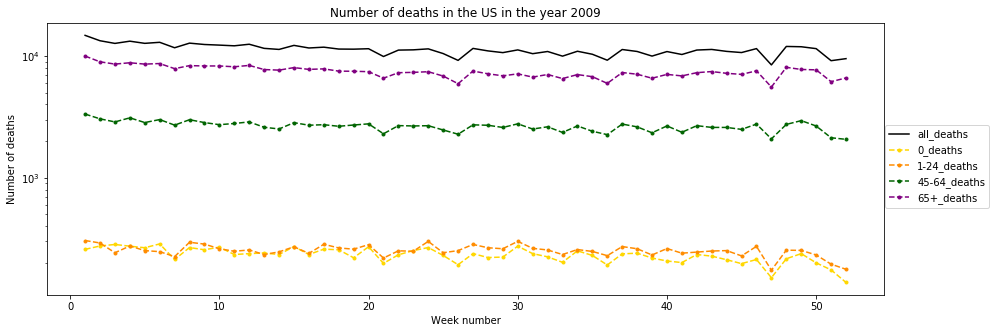

In [39]:
plot_total_deaths_per_week_by_year(2009, ['PI_deaths', '25-44_deaths'])

In [40]:
def bar_total_deaths_per_week_by_year(year, exclude_age=[]):
    
    dy = dict_year[year].drop(columns=exclude_age).groupby(['week']).sum()
    dy4bars = dy.drop(columns=['PI_deaths', 'all_deaths'])
    dy4plot = dy.loc[:,['PI_deaths', 'all_deaths']]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    ax.plot(dy4plot.index, dy4plot['all_deaths'], linestyle='-', marker='.', color='black', label='all_deaths')
    ax.plot(dy4plot.index, dy4plot['PI_deaths'], marker='', linestyle='-', color='red', label='PI_deaths')
    
    for c, col in enumerate(dy4bars.columns):
        ax.bar(dy4bars.index, dy4bars[col], bottom=dy4bars.iloc[:,0:c].sum(axis=1), alpha=0.5, color=colours_dict[col], label=col)
    
    ax.set(title='Number of deaths in the US in the year {}'.format(year), 
           xlabel='Week number', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    
    plt.show()

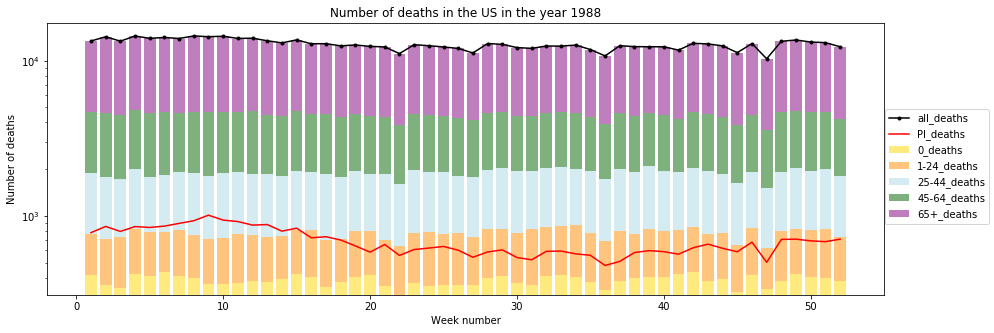

In [41]:
bar_total_deaths_per_week_by_year(1988, exclude_age=[])

In [42]:
def plot_total_deaths_per_week_by_year_compare(years=[], exclude_age=[]):

    if years == []:
        print('The argument "years" must be a non-empty list.')
        
    elif(len(years) == 1):
        print('If you are interested in a single year, use plot_total_deaths_per_week_by_year instead.')
        
    else:
        fig, ax = plt.subplots(len(years),1, sharey=True)
        fig.set_size_inches(15,5*len(years))
                
        for y, year in enumerate(years):
            dy = dict_year[year].drop(columns=exclude_age).groupby(['week']).sum()
            for col in dy.columns:
                if col == 'all_deaths':
                    ax[y].plot(dy.index, dy[col], linestyle='-', color='black', label=col)
                elif col == 'PI_deaths':
                    ax[y].plot(dy.index, dy[col], marker='', linestyle='-', color='red', label=col)
                else:
                    ax[y].plot(dy.index, dy[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

            ax[y].set(title='Number of deaths in the US in the year {}'.format(year), 
                      xlabel='Week number', ylabel='Number of deaths')
            
        plt.yscale('log')
        
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        fig.legend(by_label.values(), by_label.keys(), loc='right')
        
        plt.show()

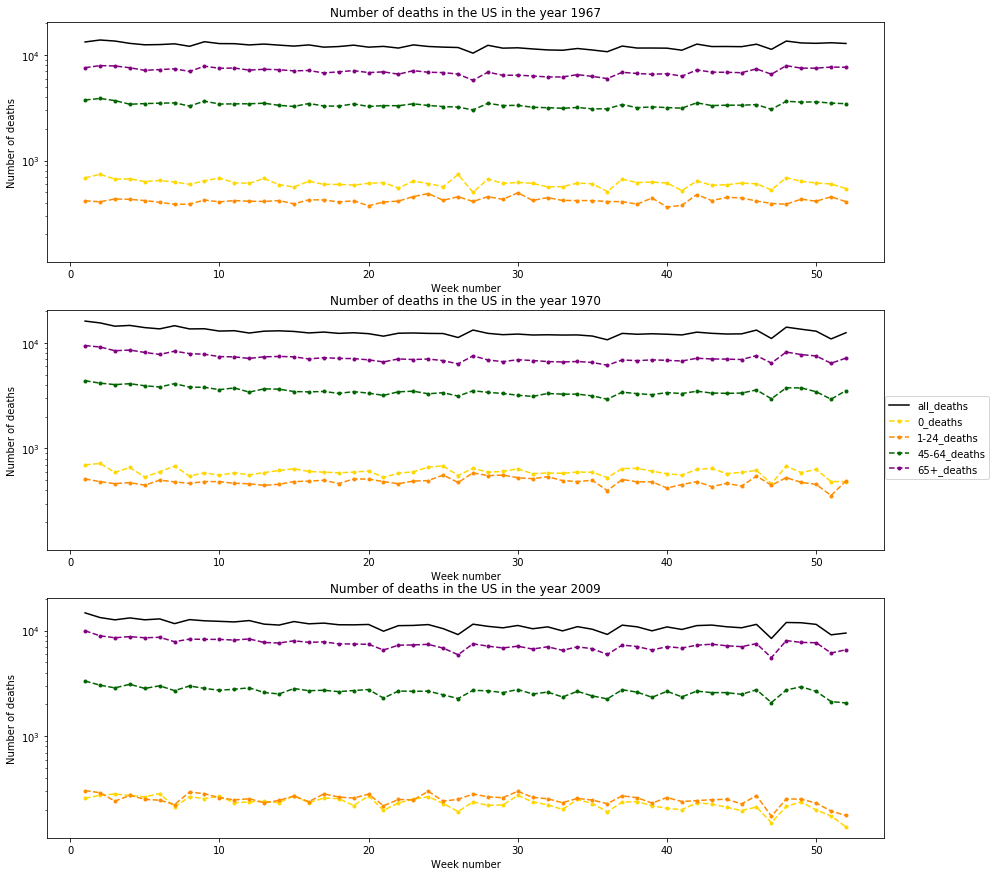

In [43]:
plot_total_deaths_per_week_by_year_compare([1967, 1970, 2009], ['PI_deaths', '25-44_deaths'])

## Plotting total deaths per year in a given city, possibly excluding some columns

In [44]:
def plot_total_deaths_per_year_by_city(city, exclude_age=[]):
    dc = dict_city[city].drop(columns=exclude_age).groupby(['year']).sum()
    fig, ax = plt.subplots()
    
    fig.set_size_inches(15,6)
    for col in dc.columns:
        if col == 'all_deaths':
            ax.plot(dc.index, dc[col], linestyle='-', color='black', label=col)
        elif col == 'PI_deaths':
            ax.plot(dc.index, dc[col], marker='', linestyle='-', color='red', label=col)
        else:
            ax.plot(dc.index, dc[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

    ax.set(title='Number of deaths in {} between 1962 and 2016'.format(city), 
           xlabel='Year', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    plt.show()

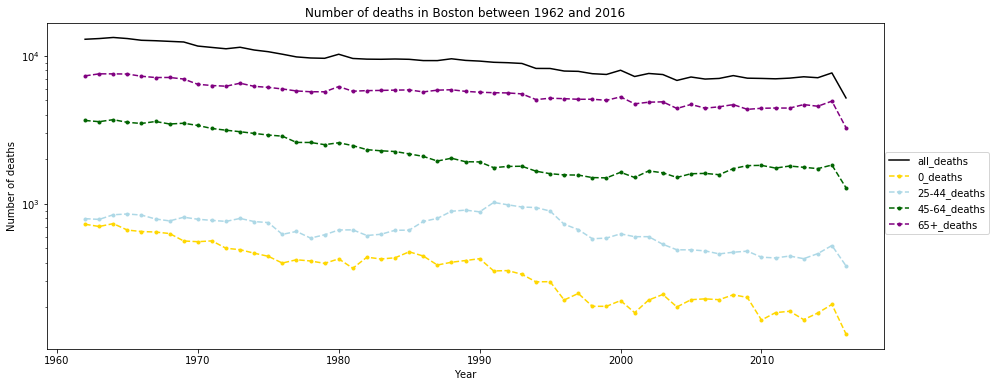

In [45]:
plot_total_deaths_per_year_by_city('Boston',['PI_deaths', '1-24_deaths'])

In [46]:
def bar_total_deaths_per_year_by_city(city, exclude_age=[]):
    
    dc = dict_city[city].drop(columns=exclude_age).groupby(['year']).sum()
    dc4bars = dc.drop(columns=['PI_deaths', 'all_deaths'])
    dc4plot = dc.loc[:,['PI_deaths', 'all_deaths']]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    ax.plot(dc4plot.index, dc4plot['all_deaths'], linestyle='-', marker='.', color='black', label='all_deaths')
    ax.plot(dc4plot.index, dc4plot['PI_deaths'], linestyle='-', marker='', color='red', label='PI_deaths')
    
    for c, col in enumerate(dc4bars.columns):
        ax.bar(dc4bars.index, dc4bars[col], bottom=dc4bars.iloc[:,0:c].sum(axis=1), alpha=0.5, color=colours_dict[col], label=col)
    
    ax.set(title='Number of deaths in {} between 1962 and 2016'.format(city), 
           xlabel='Year', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    
    plt.show()

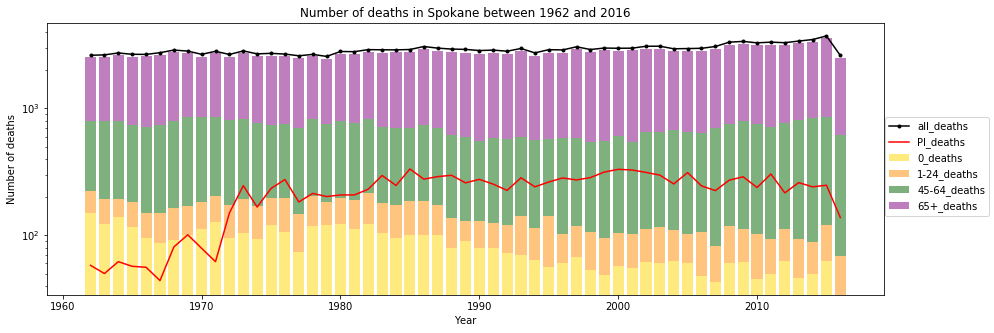

In [47]:
bar_total_deaths_per_year_by_city('Spokane', exclude_age=['25-44_deaths'])

In [48]:
def plot_total_deaths_per_year_by_city_compare(cities=[], exclude_age=[]):
    if cities == []:
        print('The argument "cities" must be a non-empty list.')
    else:
        fig, ax = plt.subplots(len(cities),1, sharey=True)
        fig.set_size_inches(15,5*len(cities))
        
        for c, city in enumerate(cities):
            dc = dict_city[city].drop(columns=exclude_age).groupby(['year']).sum()
            for col in dc.columns:
                if col == 'all_deaths':
                    ax[c].plot(dc.index, dc[col], linestyle='-', color='black', label=col)
                elif col == 'PI_deaths':
                    ax[c].plot(dc.index, dc[col], marker='', linestyle='-', color='red', label=col)
                else:
                    ax[c].plot(dc.index, dc[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

            ax[c].set(title='Number of deaths in {} between 1962 and 2016'.format(city), 
                      xlabel='Year', ylabel='Number of deaths')
            
        plt.yscale('log')
        
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        fig.legend(by_label.values(), by_label.keys(), loc='right')

        plt.show()

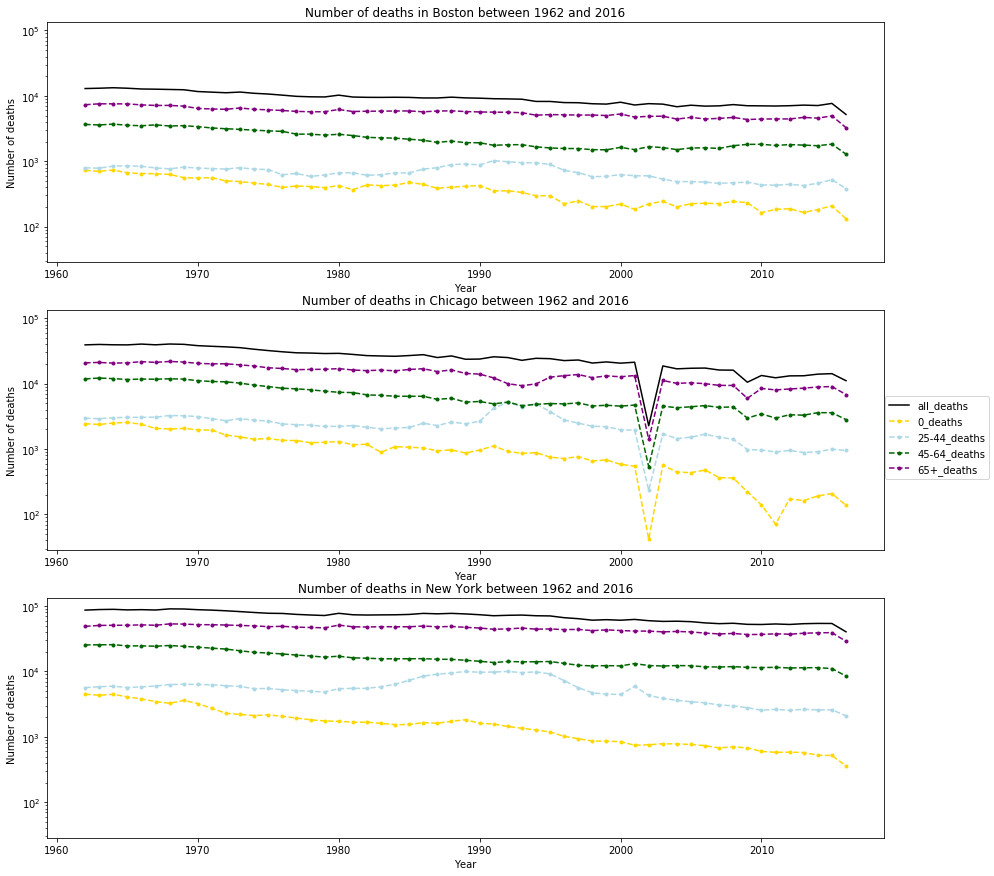

In [49]:
plot_total_deaths_per_year_by_city_compare(['Boston', 'Chicago', 'New York'], ['PI_deaths', '1-24_deaths'])

Chicago shows some unexpected trends:
* 1991-1995 there are significantly more deaths in the 1-24 age group than before or after; at the same time, there is also a drop in the nuber of deaths in the 65+ age group. No idea why.
* 2002 there's a very suspicious drop. It turns out the data from that year are largely missing.

In [50]:
df.loc[(df['city'] == 'Chicago') & (df['year'].isin(range(1990,1997)))].groupby('year')[['1-24_deaths','65+_deaths']].sum()

df.loc[(df['city'] == 'Chicago') & (df['year'] == 2002)]

1-24_deaths  65+_deaths
year                         
1990        820.0     13994.0
1991       3252.0     12263.0
1992       3760.0      9997.0
1993       3510.0      9317.0
1994       3864.0      9913.0
1995       2060.0     12569.0
1996        821.0     13266.0

year week    week_end region state     city  PI_deaths  all_deaths  \
106948  2002   10  03/09/2002      3    IL  Chicago       29.0       402.0   
106984  2002   46  11/16/2002      3    IL  Chicago       21.0       324.0   
106985  2002   47  11/23/2002      3    IL  Chicago        6.0       126.0   
106986  2002   48  11/30/2002      3    IL  Chicago       25.0       281.0   
106987  2002   49  12/07/2002      3    IL  Chicago       29.0       365.0   
106988  2002   50  12/14/2002      3    IL  Chicago       23.0       366.0   
106990  2002   52  12/28/2002      3    IL  Chicago       28.0       408.0   

        0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  65+_deaths  
106948      12.0          9.0          47.0          99.0       235.0  
106984       8.0          5.0          27.0          78.0       205.0  
106985       1.0          3.0          13.0          29.0        80.0  
106986       2.0          3.0          34.0          65.0       176.0  
106987      11.0          7.0          26.0          74.0       247.0  
106988       5.0         11.0          33.0          91.0       226.0  
106990       3.0         18.0          54.0         101.0       232.0

## Plotting total deaths per year in a given state, possibly excluding some columns

We might be interested in looking at the number of deaths in a given state aggregating the figures of all cities in that state. Comparing plots among different states is in general not meaningful, both because different states have different populations (and we don't have the total population data to introduce some normalised metric), and also because our DataFrame doesn't represent all states equally: MA has nine cities, IL has three, NM and AR have one. Nevertheless we write the function for comparisons as an exercise.

In [51]:
def plot_total_deaths_per_year_by_state(state, exclude_age=[]):
    
    subdf = df[df['state'] == state].drop(columns=exclude_age)
    
    ds = subdf.groupby(['year']).sum()
    fig, ax = plt.subplots()
    
    fig.set_size_inches(15,6)
    for col in ds.columns:
        if col == 'all_deaths':
            ax.plot(ds.index, ds[col], linestyle='-', color='black', label=col)
        elif col == 'PI_deaths':
            ax.plot(ds.index, ds[col], marker='', linestyle='-', color='red', label=col)
        else:
            ax.plot(ds.index, ds[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

    ax.set(title='Number of deaths in {} ('.format(state) + ', '.join(subdf.city.unique()) + ') between 1962 and 2016', 
           xlabel='Year', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    plt.show()

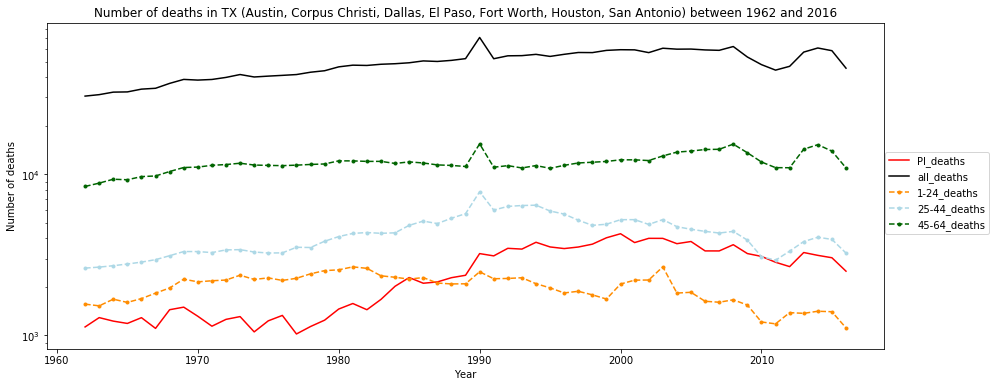

In [52]:
plot_total_deaths_per_year_by_state('TX', exclude_age=['0_deaths', '65+_deaths'])

In [53]:
def bar_total_deaths_per_year_by_state(state, exclude_age=[]):
    
    subdf = df[df.state == state].drop(columns=exclude_age)
    
    ds = subdf.groupby(['year']).sum()
    ds4bars = ds.drop(columns=['PI_deaths', 'all_deaths'])
    ds4plot = ds.loc[:,['PI_deaths', 'all_deaths']]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    ax.plot(ds4plot.index, ds4plot['all_deaths'], linestyle='-', marker='.', color='black', label='all_deaths')
    ax.plot(ds4plot.index, ds4plot['PI_deaths'], linestyle='-', marker='', color='red', label='PI_deaths')
    
    for c, col in enumerate(ds4bars.columns):
        ax.bar(ds4bars.index, ds4bars[col], bottom=ds4bars.iloc[:,0:c].sum(axis=1), alpha=0.5, color=colours_dict[col], label=col)
    
    ax.set(title='Number of deaths in {} between 1962 and 2016'.format(state), 
           xlabel='Year', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    
    plt.show()

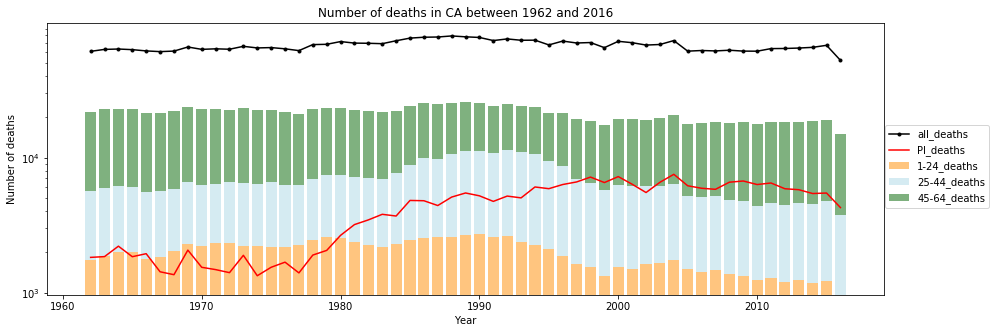

In [54]:
bar_total_deaths_per_year_by_state('CA', exclude_age=['0_deaths', '65+_deaths'])

In [55]:
def plot_total_deaths_per_year_by_state_compare(states=[], exclude_age=[]):
    if states == []:
        print('The argument "states" must be a non-empty list.')
    else:
        subdf = df[df['state'].isin(states)].drop(columns=exclude_age)
        
        fig, ax = plt.subplots(len(states),1, sharey=True)
        fig.set_size_inches(15,5*len(states))
        
        for s, state in enumerate(states):
            ds = subdf[subdf['state'] == state].groupby(['year']).sum()
            for col in ds.columns:
                if col == 'all_deaths':
                    ax[s].plot(ds.index, ds[col], linestyle='-', color='black', label=col)
                elif col == 'PI_deaths':
                    ax[s].plot(ds.index, ds[col], marker='', linestyle='-', color='red', label=col)
                else:
                    ax[s].plot(ds.index, ds[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

            ax[s].set(title='Number of deaths in {} ('.format(state) + ', '.join(subdf[subdf.state == state].city.unique()) + ') between 1962 and 2016', 
                      xlabel='Year', ylabel='Number of deaths')
            
        plt.yscale('log')
        
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        fig.legend(by_label.values(), by_label.keys(), loc='right')

        plt.show()

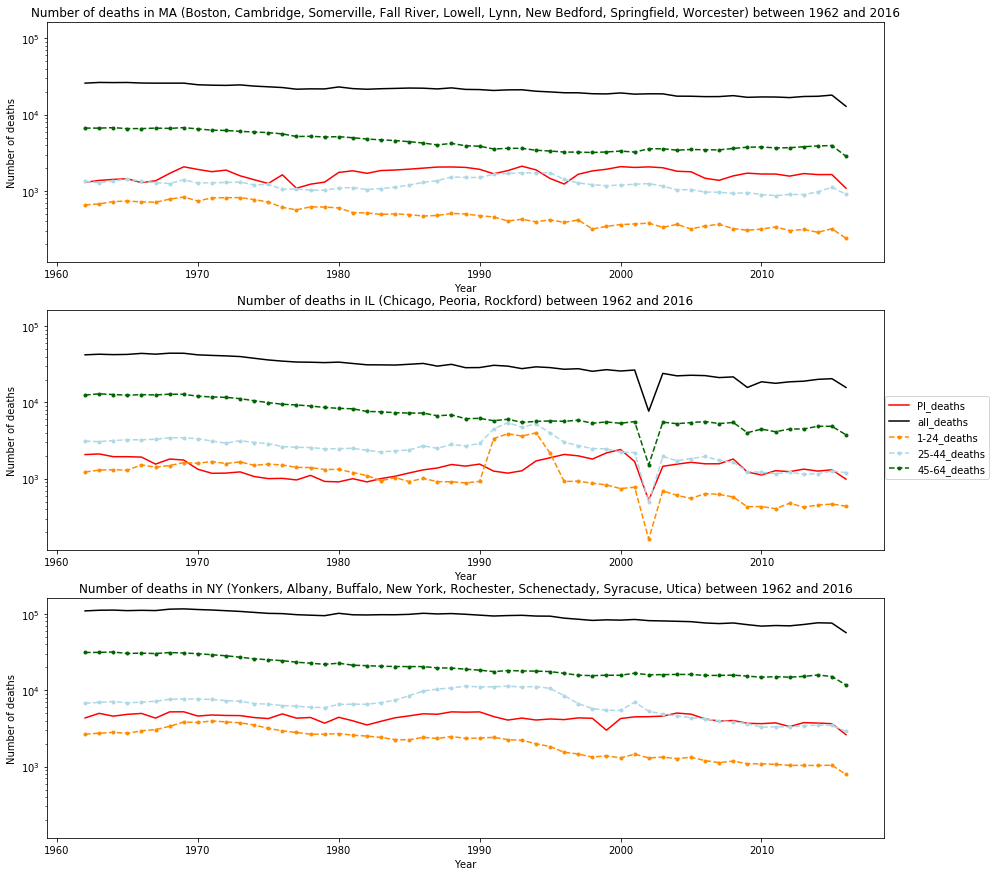

In [56]:
plot_total_deaths_per_year_by_state_compare(['MA', 'IL', 'NY'], ['0_deaths', '65+_deaths'])

## Plotting the incidence of pneumonia/influenza deaths over time.

We construct DataFrames displaying - for each year and for each state/city - the number of PI deaths and the total number of deaths. 

In [60]:
# Start by creating the DataFrames by grouping the main one.

df_PI_incidence_by_state = df.groupby(['year', 'state']).sum().loc[:,['PI_deaths', 'all_deaths']]
df_PI_incidence_by_city = df.groupby(['year', 'city', 'state']).sum().loc[:,['PI_deaths', 'all_deaths']]

# Function to compute the US average in a given year

def US_avg(year):
    PI_vs_all = df.loc[df['year'] == year, ['PI_deaths', 'all_deaths']].sum()
    
    return PI_vs_all[0]/PI_vs_all[1]

# Function to compute the state average in a given year

def state_avg(year, state):
    if state in one_city_states:
        return np.nan
    else:
        PI_vs_all = df.loc[(df['state'] == state) & (df['year'] == year), ['PI_deaths', 'all_deaths']].sum()
        if PI_vs_all[1] != 0:
            return PI_vs_all[0]/PI_vs_all[1]
        else:
            return np.nan

# The state average is meaningless if only one city from that state is included in the DataFrame. 
# Let's list the cities that are the only representatives from their state.

tmp = df.groupby(['state', 'city']).sum()
one_city_states = [ind[0] for ind in tmp.index if tmp.loc[pd.IndexSlice[ind[0],:],:].shape[0] == 1]
print('States with only one representative: ', ', '.join(one_city_states))
del tmp

States with only one representative:  AR, DC, DE, HI, IA, ID, KY, MD, NC, NM, NV, OK, OR, RI, WI


In [61]:
# Create dictionaries storing the values of the average functions for all the years (or the pairs (year, state))
# The state average dictionary takes a bit to compute, but it's worth it.

yearly_US_avg_dict = {y:US_avg(y) for y in range(1962, 2017)}
yearly_state_avg_dict = {(y,s):state_avg(y,s) for s in df.state.unique() for y in range(1962, 2017)}

We now add columns to the *PI_incidence* DataFrames with additional information.
the ratio of the two, the national average in that year, the relative difference between the local incidence rate and the national average.

In [62]:
# Add column with the ratio of PI_deaths to all_deaths in each state/city

df_PI_incidence_by_state = df_PI_incidence_by_state.assign(ratio = df_PI_incidence_by_state['PI_deaths']/df_PI_incidence_by_state['all_deaths'])
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(ratio = df_PI_incidence_by_city['PI_deaths']/df_PI_incidence_by_city['all_deaths'])

# Add column with the national average of that ratio and with the state average (only in the city DataFrame)
# (using the precomputed dictionaries avoids recomputing the average values dozens of time for each year)

df_PI_incidence_by_state = df_PI_incidence_by_state.assign(US_avg = df_PI_incidence_by_state.index.get_level_values(0).map(yearly_US_avg_dict))
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(US_avg = df_PI_incidence_by_city.index.get_level_values(0).map(yearly_US_avg_dict))
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(state_avg = df_PI_incidence_by_city.index.droplevel(1).map(yearly_state_avg_dict))

# Add columns the relative difference between the local incidence and the US average and/or the state average (only in the city DataFrame).

df_PI_incidence_by_state = df_PI_incidence_by_state.assign(US_rel_diff = (df_PI_incidence_by_state['ratio'] - df_PI_incidence_by_state['US_avg'])/df_PI_incidence_by_state['US_avg'])
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(US_rel_diff = (df_PI_incidence_by_city['ratio'] - df_PI_incidence_by_city['US_avg'])/df_PI_incidence_by_city['US_avg'])
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(state_rel_diff = (df_PI_incidence_by_city['ratio'] - df_PI_incidence_by_city['state_avg'])/df_PI_incidence_by_city['state_avg'])

df_PI_incidence_by_state
df_PI_incidence_by_city

PI_deaths  all_deaths     ratio    US_avg  US_rel_diff
year state                                                        
1962 AL         293.0      8795.0  0.033314  0.039929    -0.165660
     AR         244.0      3197.0  0.076322  0.039929     0.911431
     AZ         225.0      6885.0  0.032680  0.039929    -0.181554
     CA        1824.0     61039.0  0.029883  0.039929    -0.251608
     CO         471.0      8027.0  0.058677  0.039929     0.469532
...               ...         ...       ...       ...          ...
2016 TX        2505.0     45468.0  0.055094  0.063225    -0.128605
     UT         538.0      7435.0  0.072360  0.063225     0.144497
     VA         152.0      3698.0  0.041103  0.063225    -0.349885
     WA         556.0      8037.0  0.069180  0.063225     0.094193
     WI         118.0      3295.0  0.035812  0.063225    -0.433578

[2159 rows x 5 columns]

PI_deaths  all_deaths     ratio    US_avg  state_avg  \
year city        state                                                         
1962 Akron       OH          40.0      2920.0  0.013699  0.039929   0.026617   
     Albany      NY          65.0      2331.0  0.027885  0.039929   0.039596   
     Albuquerque NM         134.0      1670.0  0.080240  0.039929        NaN   
     Allentown   PA          65.0      1810.0  0.035912  0.039929   0.033538   
     Atlanta     GA         226.0      6208.0  0.036405  0.039929   0.048250   
...                           ...         ...       ...       ...        ...   
2016 Wichita     KS         252.0      3636.0  0.069307  0.063225   0.070249   
     Wilimington DE          44.0       488.0  0.090164  0.063225        NaN   
     Worcester   MA         341.0      2412.0  0.141376  0.063225   0.084284   
     Yonkers     NY          57.0       684.0  0.083333  0.063225   0.045996   
     Youngstown  OH         108.0      2516.0  0.042925  0.063225   0.055482   

                        US_rel_diff  state_rel_diff  
year city        state                               
1962 Akron       OH       -0.656925       -0.485342  
     Albany      NY       -0.301635       -0.295757  
     Albuquerque NM        1.009555             NaN  
     Allentown   PA       -0.100614        0.070771  
     Atlanta     GA       -0.088266       -0.245500  
...                             ...             ...  
2016 Wichita     KS        0.096200       -0.013408  
     Wilimington DE        0.426087             NaN  
     Worcester   MA        1.236096        0.677381  
     Yonkers     NY        0.318050        0.811752  
     Youngstown  OH       -0.321068       -0.226322  

[6651 rows x 7 columns]

Now we are ready to plot the trends in each state/city.
When plotting state (city) trends we will include the US (and state, if meaningful) average for comparison.

In [63]:
def plot_PI_states(states = []):
    
    l = len(states)

    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    ax.plot(list(yearly_US_avg_dict.keys()), [100 * x for x in list(yearly_US_avg_dict.values())], 
            linestyle = '-', marker='.', color = 'red', label='US avg')
    for st in states:
        data = df_PI_incidence_by_state.loc[pd.IndexSlice[:,st],:].droplevel(level=1)
        ax.plot(data.index, 100*data['ratio'], 
                linestyle = '-', marker='.', alpha=0.4 * (l<=5) + 0.2*(l>5), label=(st if l<=5 else None))
    
    if l == 0:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in the US between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')
        
    elif l <= 5:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in ' + ', '.join(states) + ' between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')
        
    else:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in numerous states between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='right')
    plt.show()

In [64]:
def plot_PI_cities(cities = []):
    
    l = len(cities)
#     Determine corresponding states, removing duplicates by passing through sets.
    corr_states = list(set([df.loc[df.loc[df['city'] == c].first_valid_index(),'state'] for c in cities]))
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)

    ax.plot(list(yearly_US_avg_dict.keys()), [100 * x for x in list(yearly_US_avg_dict.values())], 
            linestyle = '-', marker='.', color = 'red', label='US avg')
    if len(corr_states) == 1:
        if corr_states[0] not in one_city_states:
            ax.plot(list(yearly_US_avg_dict.keys()), [100 * yearly_state_avg_dict[(y, corr_states[0])] for y in range(1962, 2017)], 
                    linestyle = '-', marker='.', color = 'gray', label=corr_states[0]+' avg')
            str_for_legend = corr_states[0]
        else:
            str_for_legend = corr_states[0]
    else:
        str_for_legend = 'different states'
        
    for c in cities:
        data = df_PI_incidence_by_city.loc[pd.IndexSlice[:,c,:],:].droplevel(level=[1,2])
        ax.plot(data.index, 100*data['ratio'], 
                linestyle = '-', marker='.', alpha=0.4 * (l<=5) + 0.2*(l>5), label=(c if l<=5 else None))

    if l == 0:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in the US between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')
        
    elif l <= 5:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in ' + ', '.join(cities) + 
               ' (' + str_for_legend + ')' + ' between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')
        
    else:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in numerous cities in ' + str_for_legend + ' between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='right')
    plt.show()    

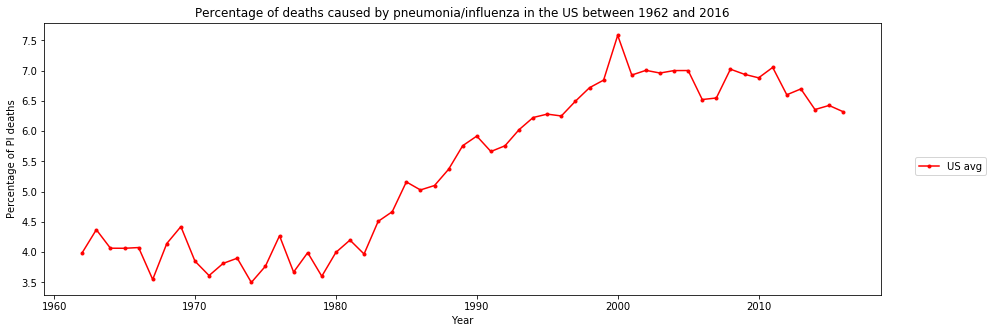

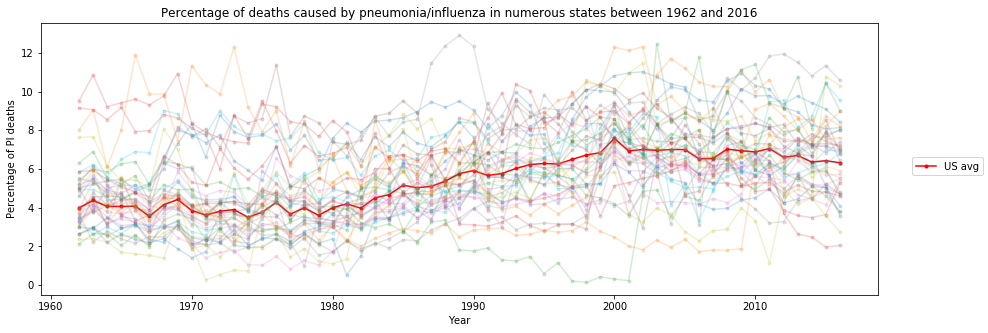

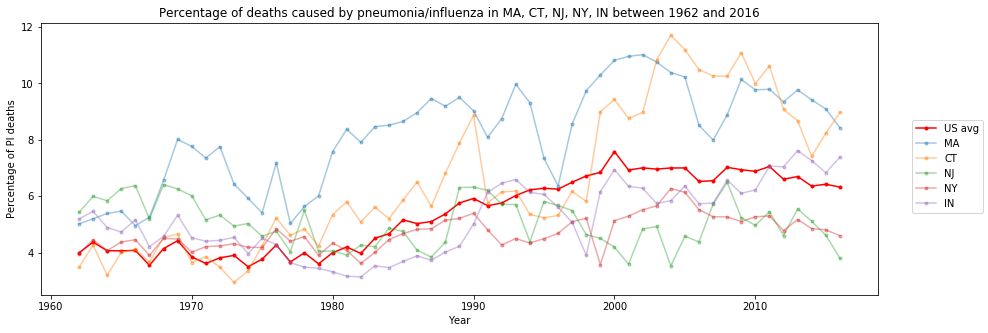

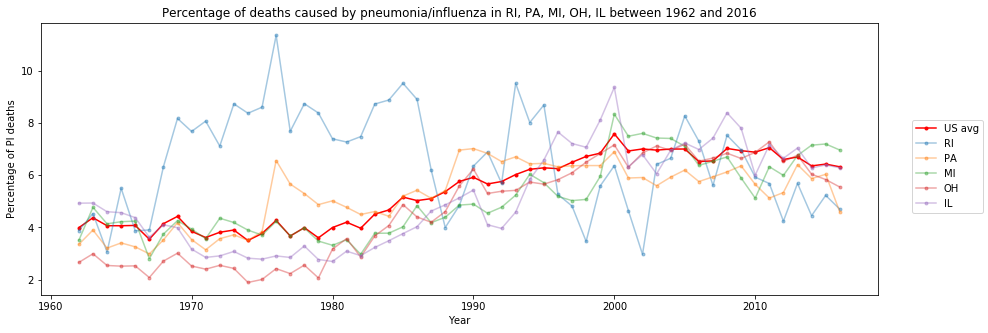

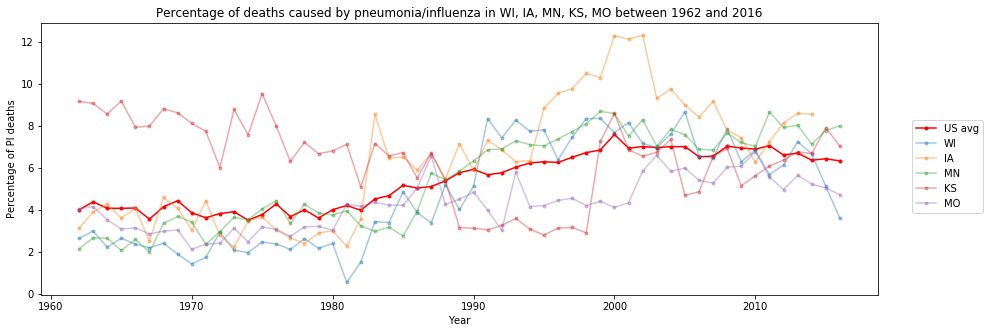

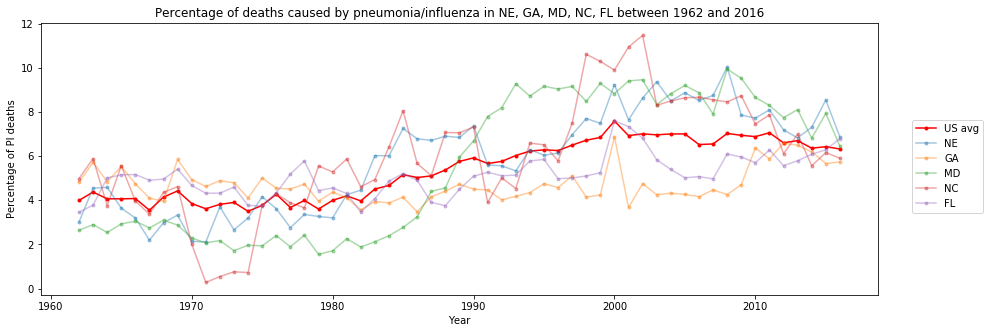

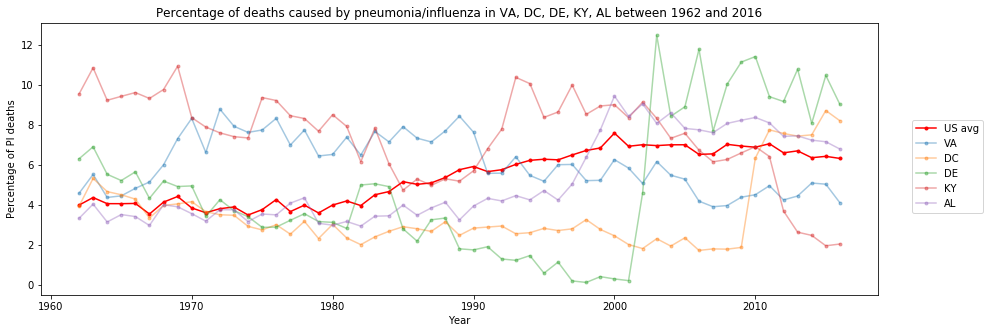

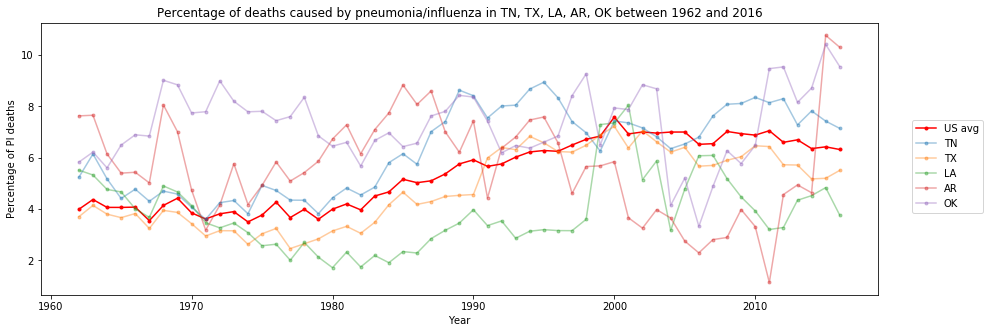

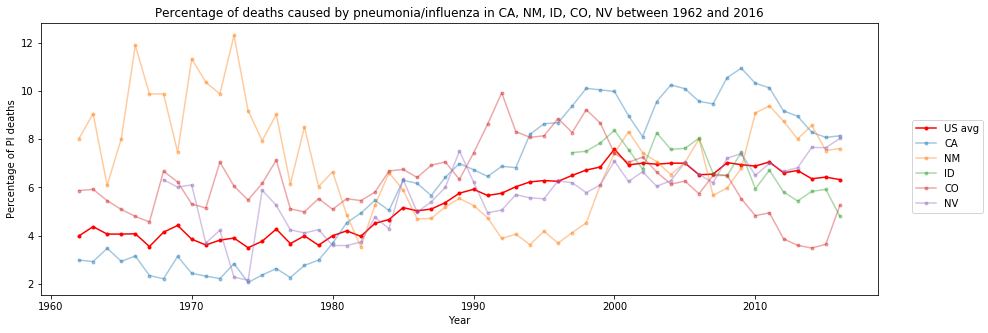

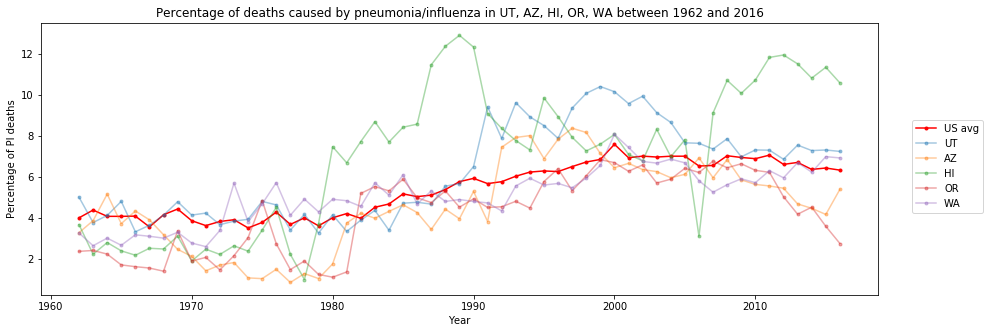

In [65]:
plot_PI_states()
plot_PI_states(df.state.unique())
for i in range(8):
    plot_PI_states(df.state.unique()[5*i:5*(i+1)])

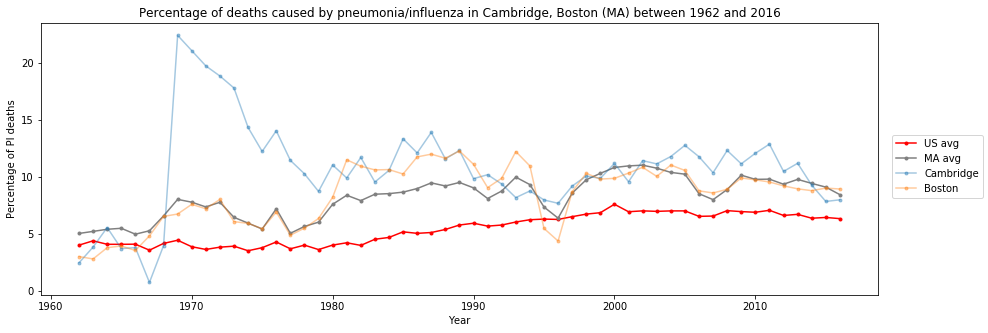

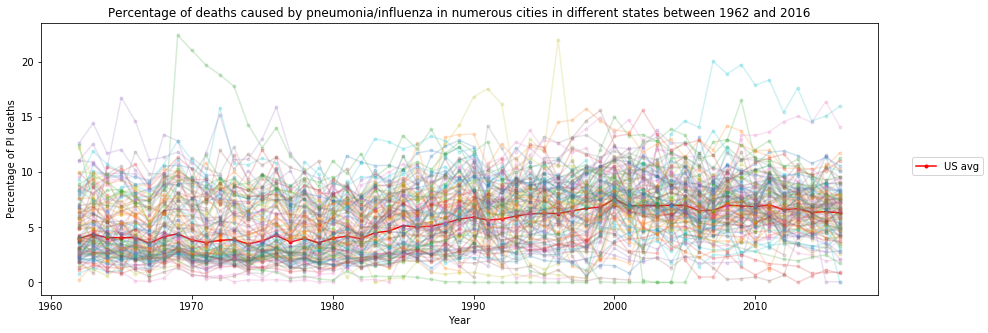

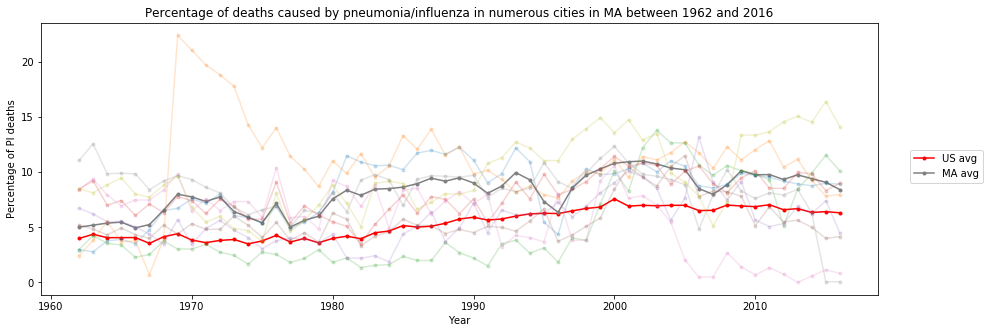

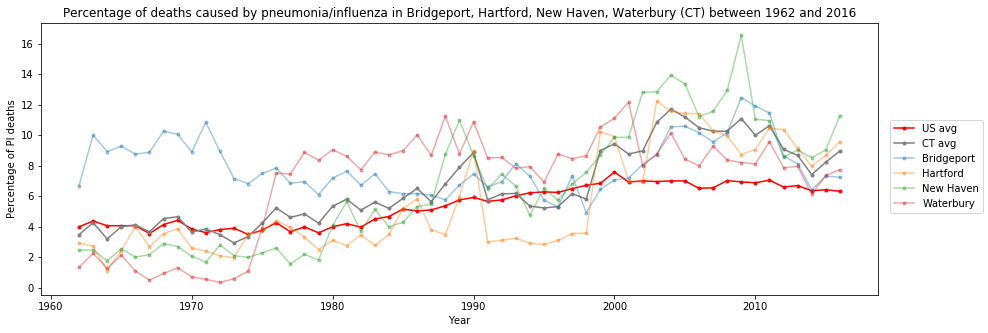

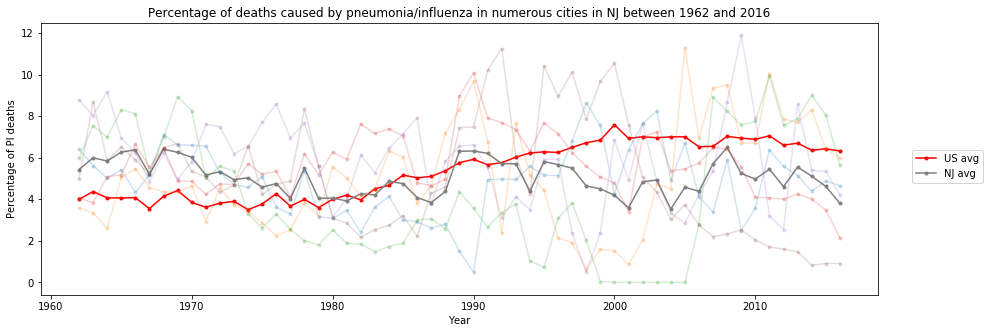

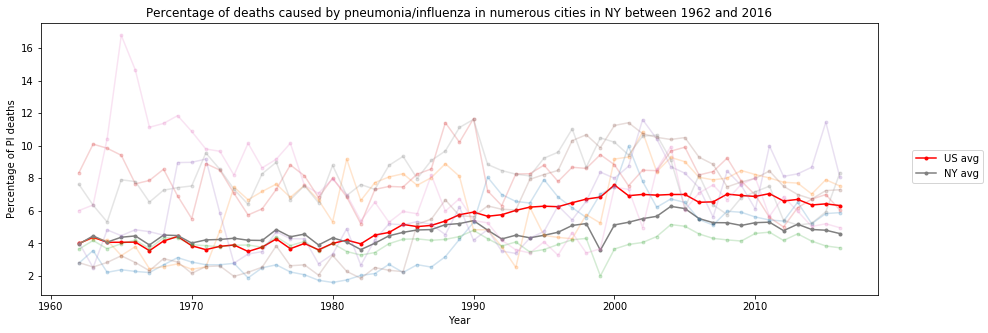

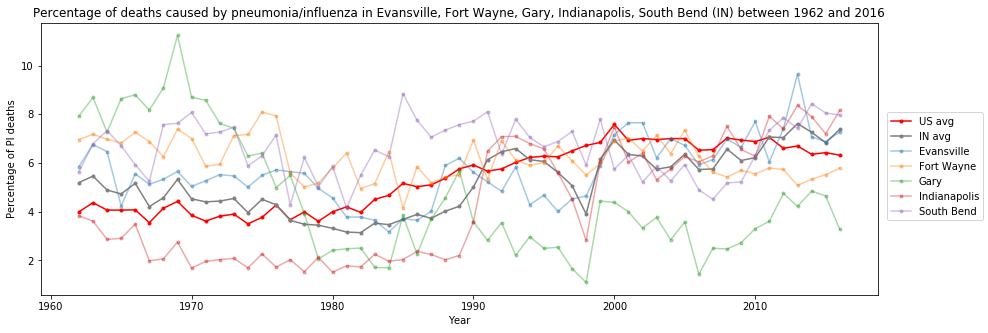

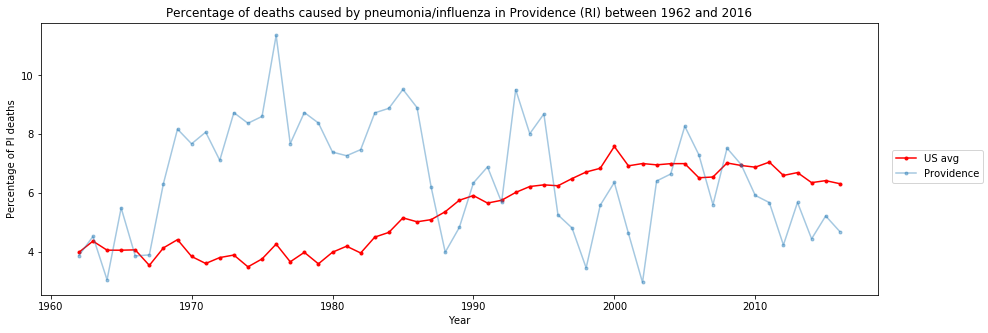

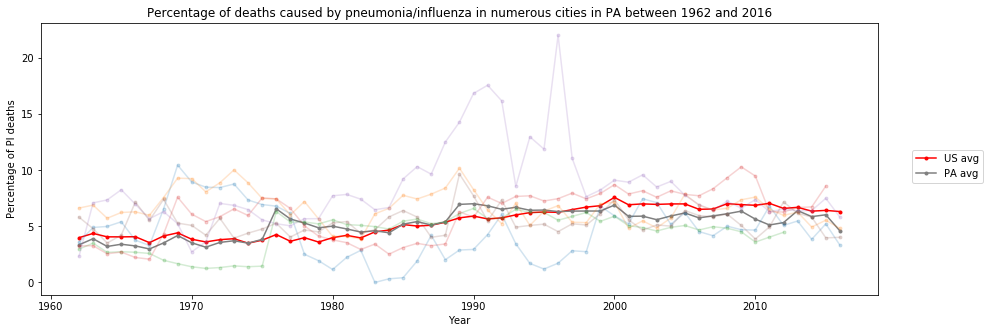

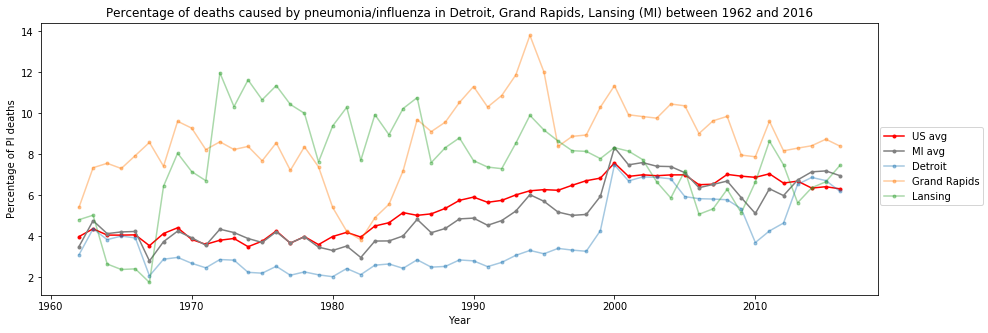

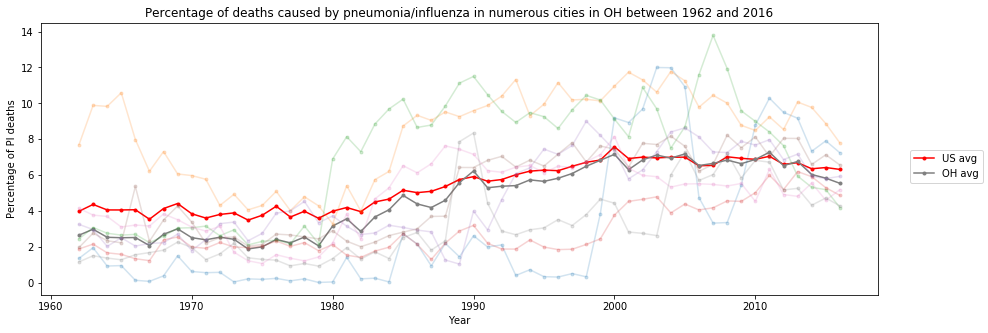

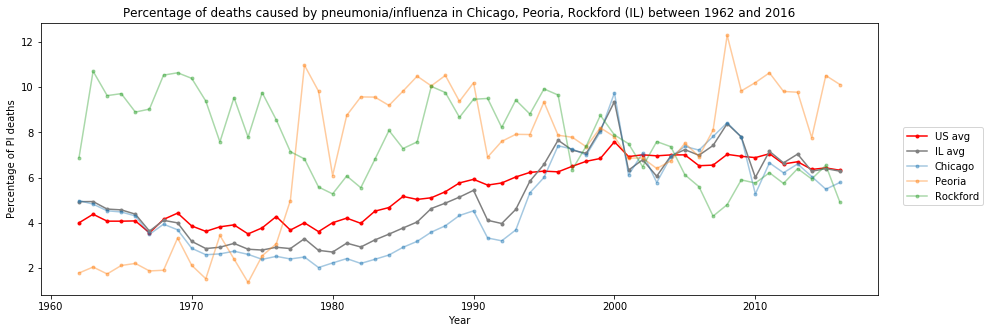

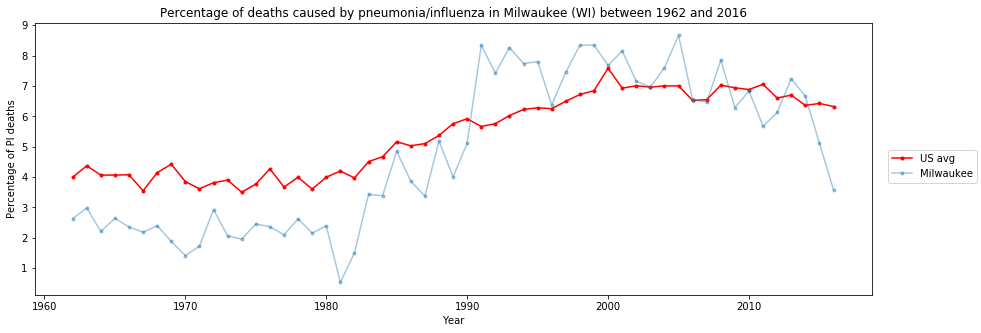

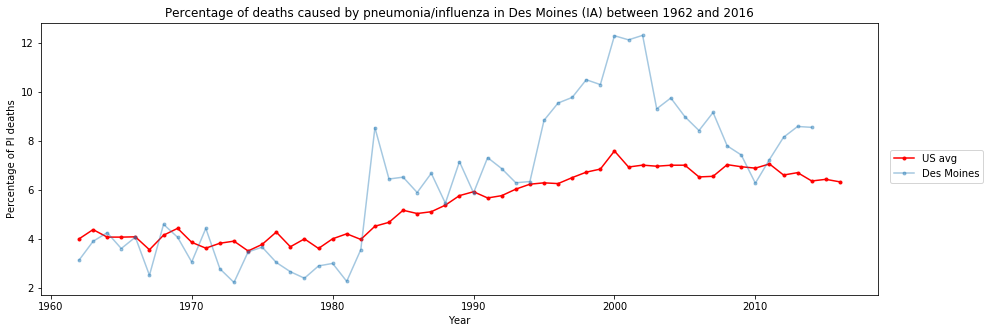

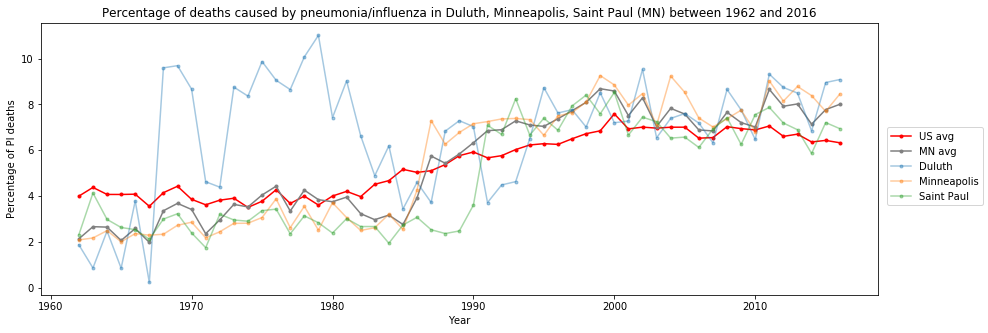

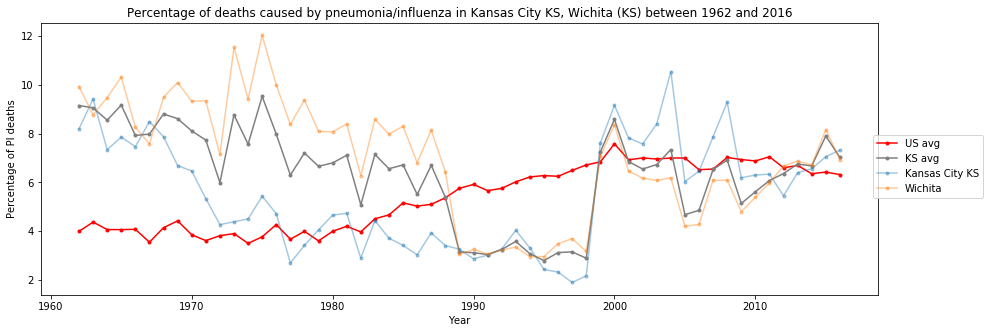

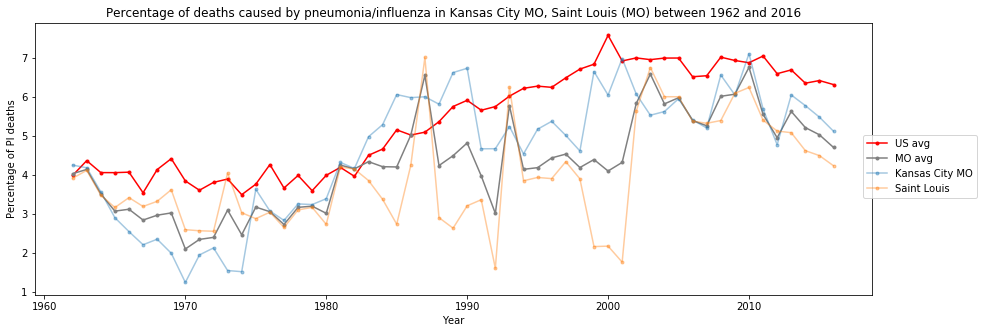

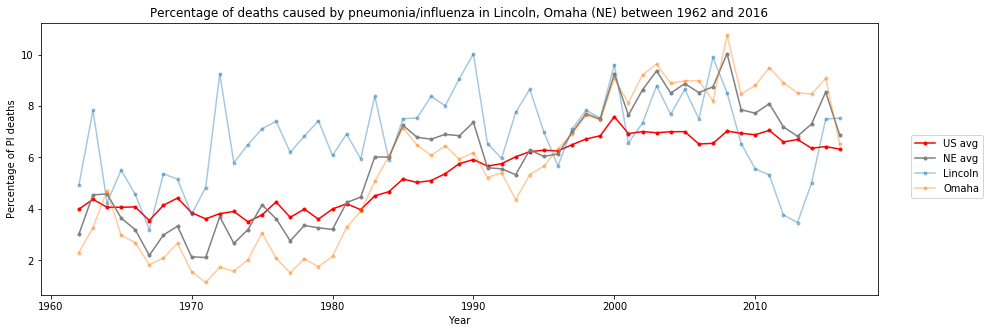

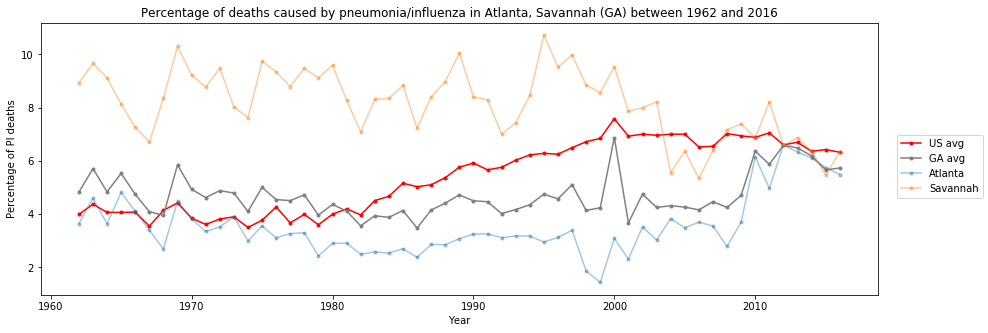

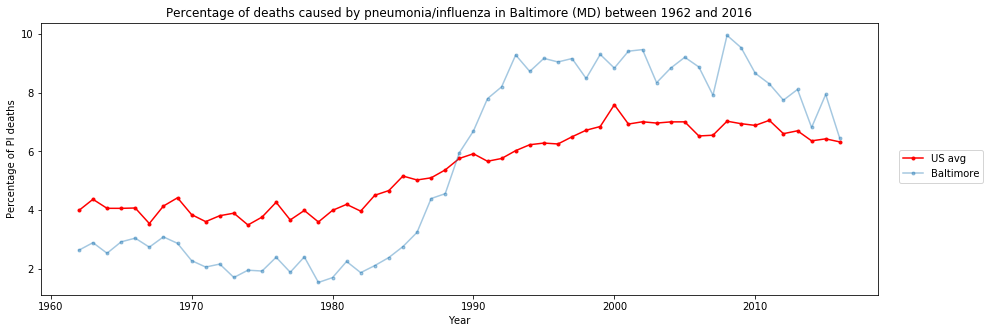

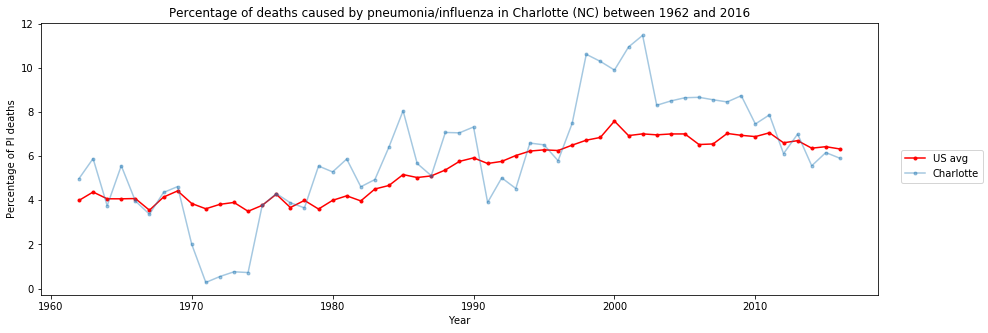

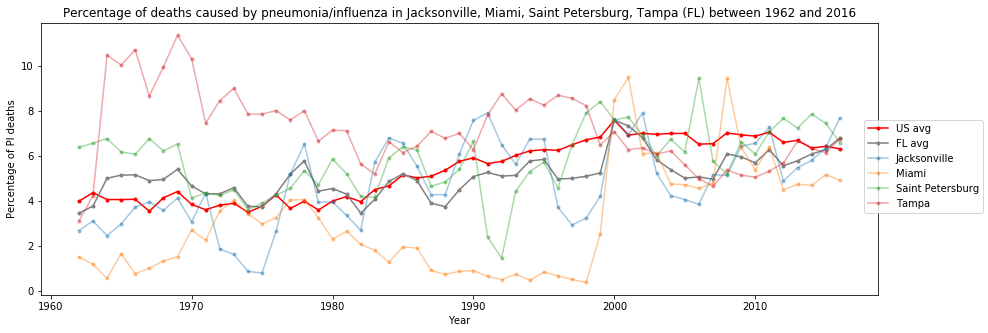

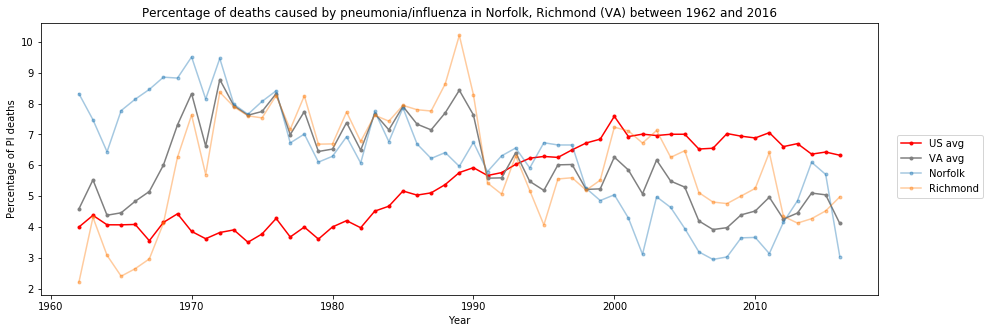

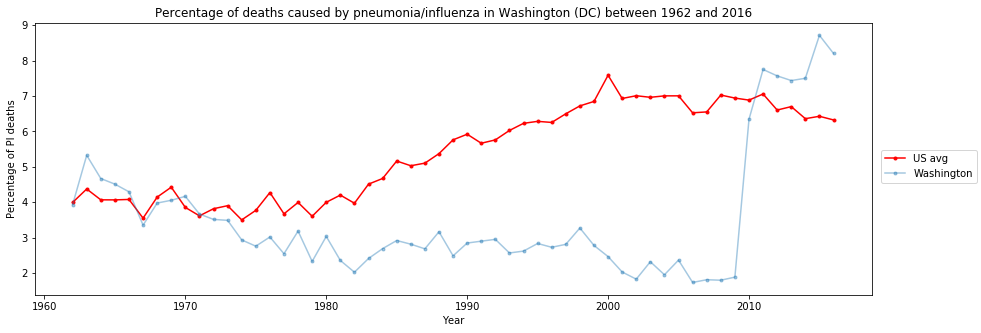

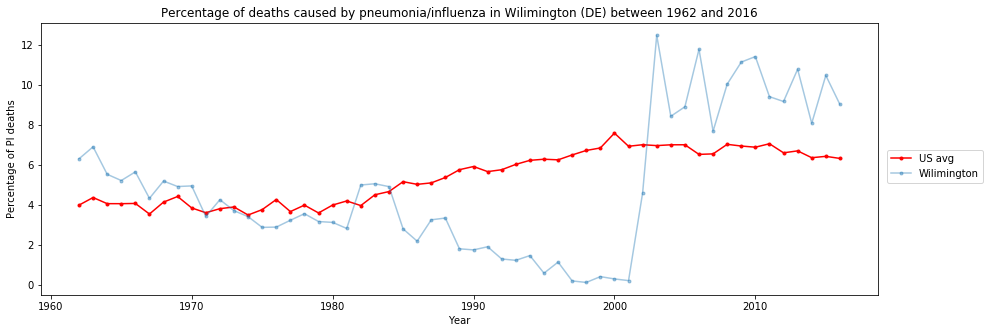

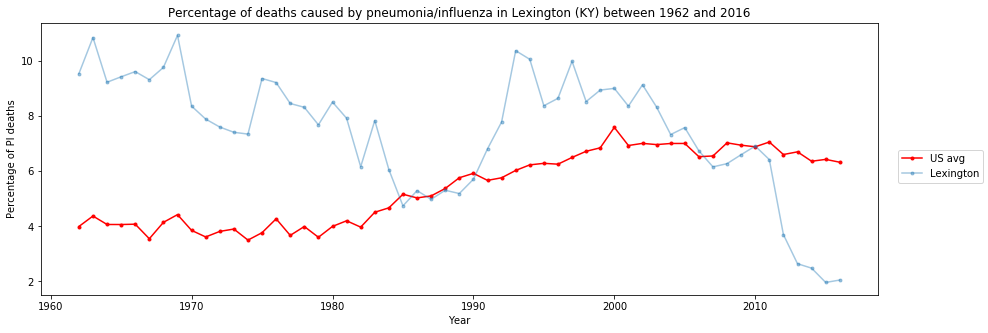

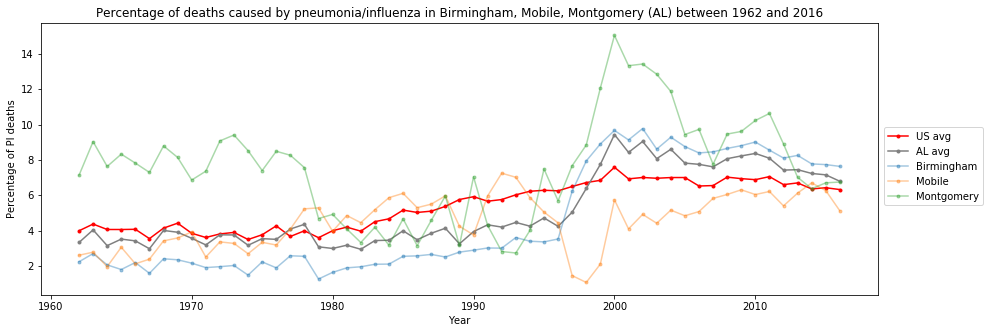

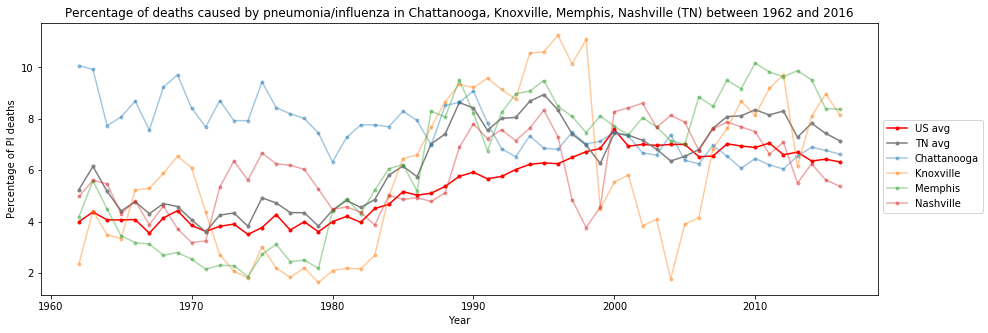

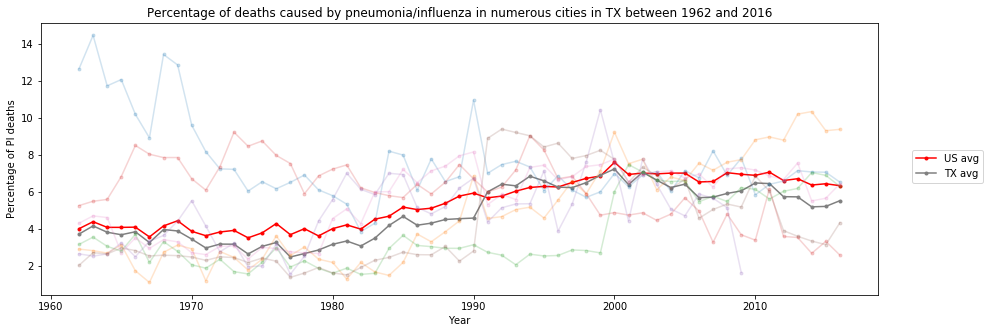

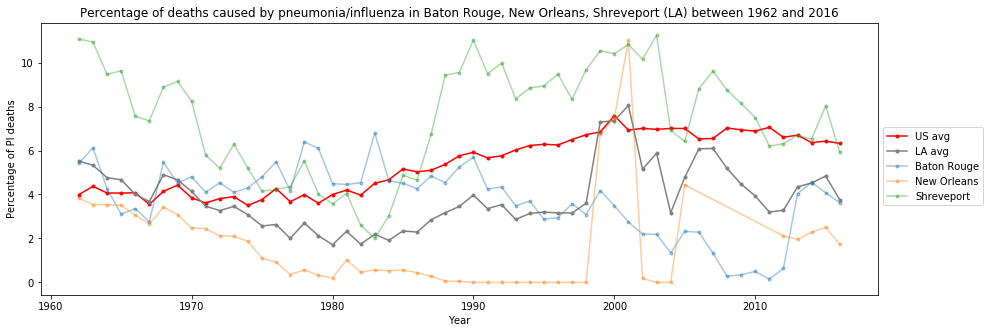

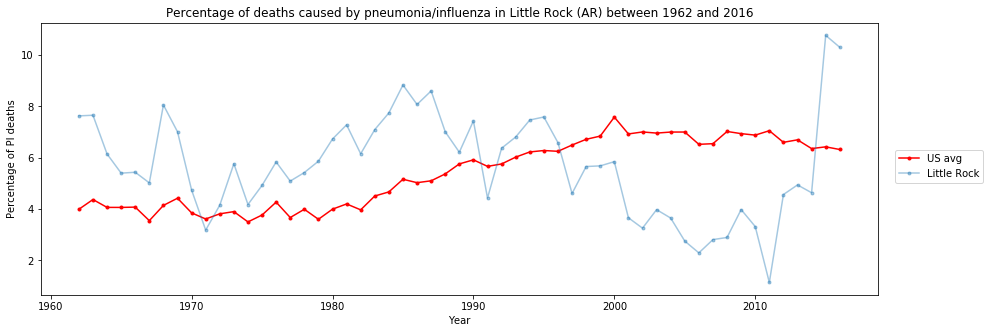

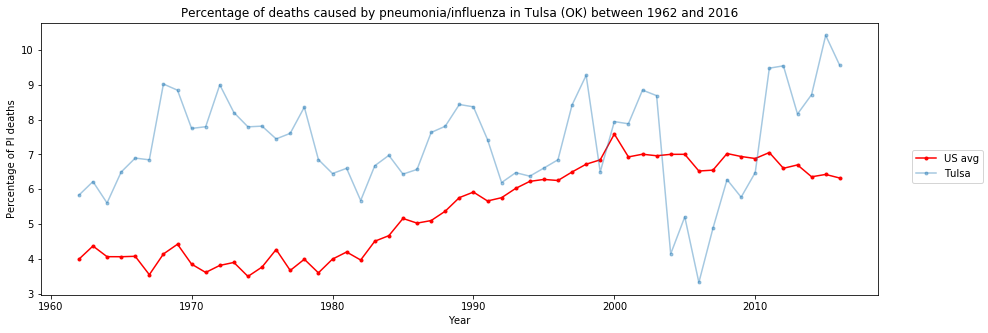

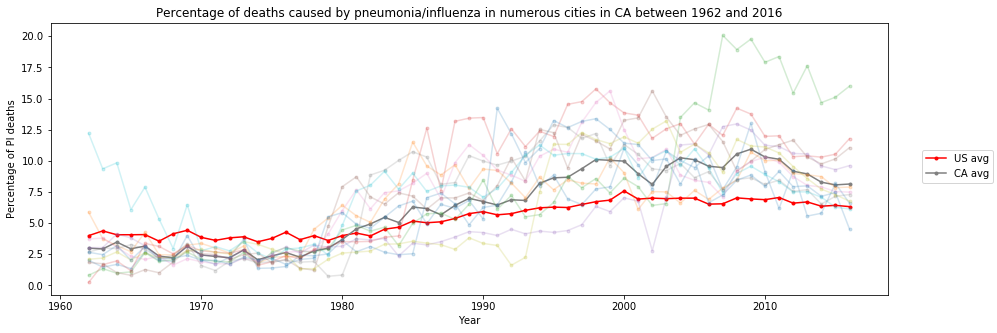

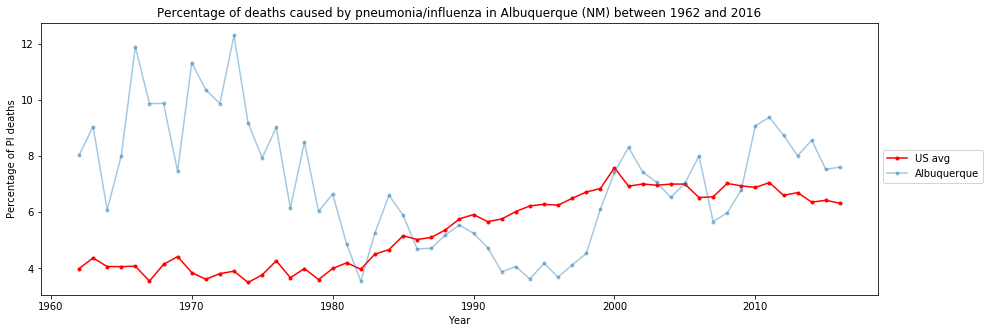

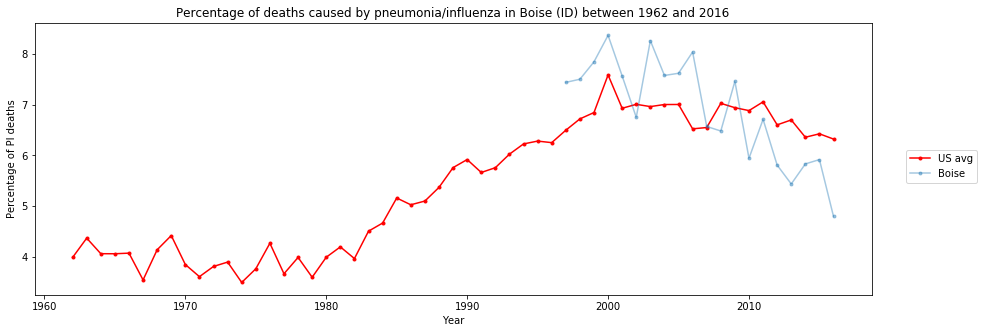

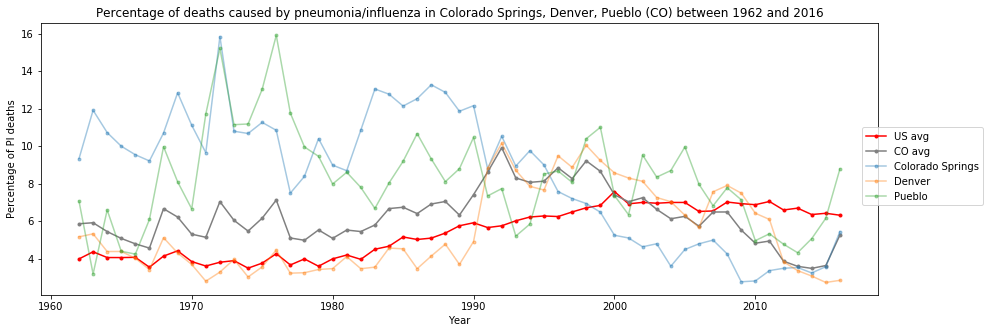

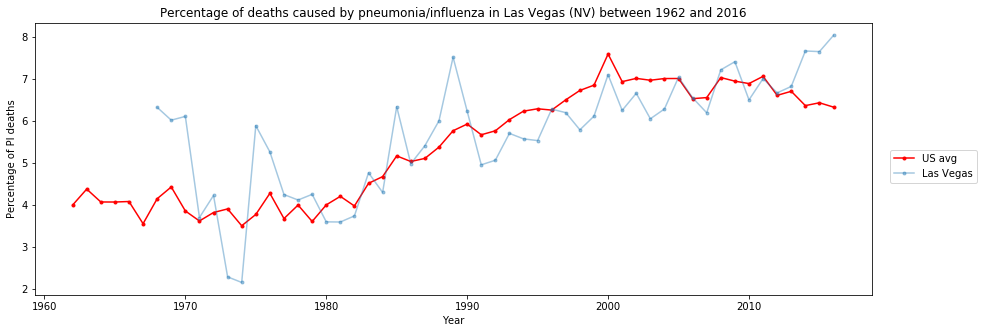

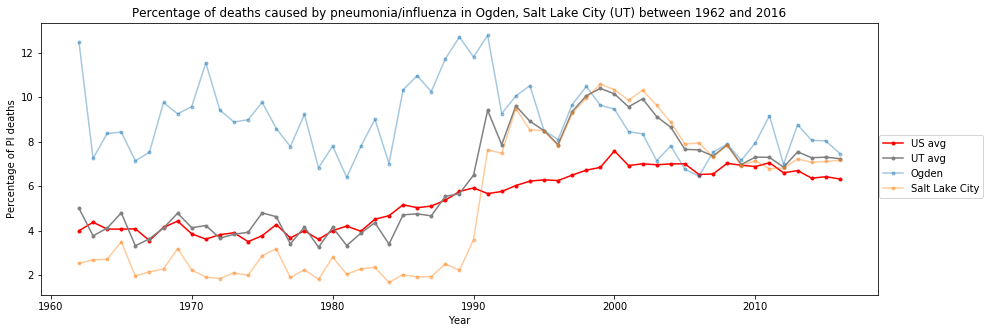

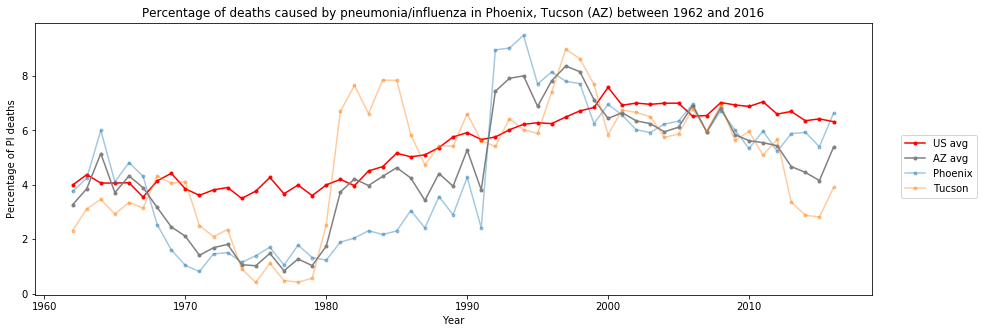

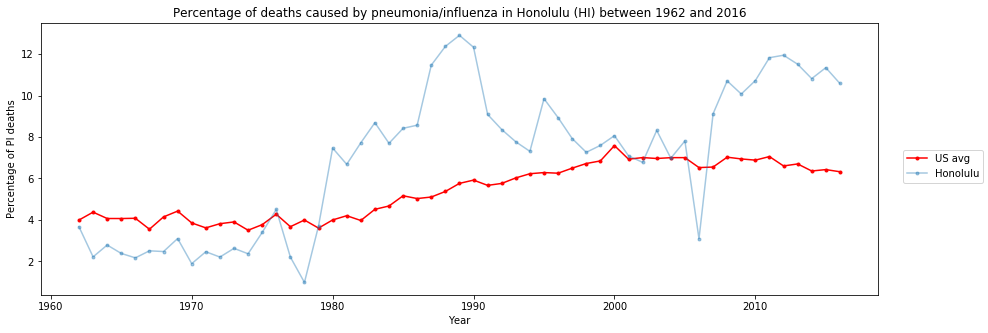

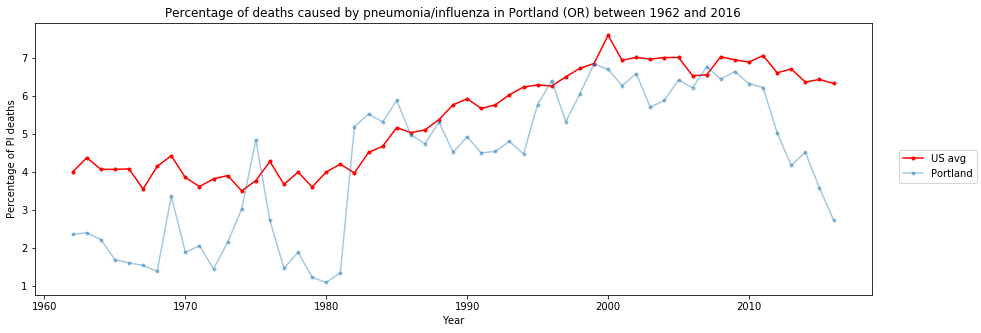

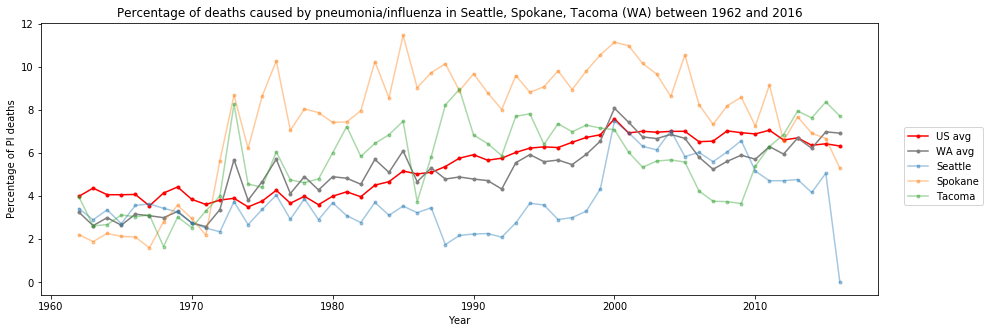

In [66]:
plot_PI_cities(['Cambridge', 'Boston'])
plot_PI_cities(df['city'].unique())
for st in df['state'].unique():
    cities_in_state = df.loc[df['state'] == st].groupby(['city']).sum().index
    plot_PI_cities(cities_in_state)

**Note**: the lines of the two Kansas City's now look plausible. Before lifting the ambiguity corrected at the top of the notebook, the same curve was drawn for both of them (due to the filtering in the plotting function), mixing both sets of data, resulting in very weird year-to-year fluctuations!

### Outliers

Looking at the above plots, we notice how several states have had significantly high PI fatality rates (compared to the national average) at different times -- e.g. MA, CT, IA peak in the early 2000s, NM in 1966 and 1973, RI in 1976. Similarly, various cities have shown strong deviations from the national and/or state average. 

We write functions that look for outliers with respect to the national average, in the sense of the boxplots. Namely those states/cities where the column *rel_diff* in a given year reads a value that lies outside the interval (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR), for Q1, Q3 the first and third quartiles, IQR = Q3 - Q1 the interquartile range. The factor multiplying IQR can be changed if desired.

In [67]:
def find_state_outliers(year, whiskers=1.5, boxplot=False, verbose=False):
    df_year = df_PI_incidence_by_state.loc[year]
    q1, q3 = df_year['US_rel_diff'].quantile(0.25), df_year['US_rel_diff'].quantile(0.75)
    pos_outliers = df_year.loc[df_year['US_rel_diff'] < q1 - whiskers*(q3-q1)]
    neg_outliers = df_year.loc[df_year['US_rel_diff'] > q3 + whiskers*(q3-q1)]
    
    if pos_outliers.empty:
        if verbose == True:
            print('Low incidence outliers in {}:'.format(year))
            print('\t' + 'No state was far below the national average.')
        else:
            pass
    else:
        print('Low incidence outliers in {}:'.format(year))
        for i in range(pos_outliers.shape[0]):
            print('\t' + 'Incidence in {0} was {1:.1f}% below the national average.'.format(pos_outliers.index[i], -100*pos_outliers.iloc[i,-1]))
        
    if neg_outliers.empty:
        if verbose == True:
            print('\n'+'High incidence outliers in {}:'.format(year))
            print('\t' + 'No state was far above the national average.')
        else:
            pass
    else:
        print('\n'+'High incidence outliers in {}:'.format(year))
        for i in range(neg_outliers.shape[0]):
            print('\t' + 'Incidence in {0} was {1:.1f}% above the national average.'.format(neg_outliers.index[i], 100*neg_outliers.iloc[i,-1]))
    
    if (not pos_outliers.empty or not neg_outliers.empty):
        print('\n--------------------------------------------------------------------------\n')
        
    if boxplot == True:
        fig, ax = plt.subplots()
        fig.set_size_inches(7, 7)
        ax.boxplot(df_year['US_rel_diff']*100, whis=whiskers)
        ax.set(title='Proportion of deaths caused by pneumonia/influenza in {0} \n relatively to the national average'.format(year))
        plt.xticks([])
        plt.show()


High incidence outliers in 1967:
	Incidence in KS was 124.9% above the national average.
	Incidence in KY was 162.4% above the national average.
	Incidence in NM was 178.0% above the national average.

--------------------------------------------------------------------------



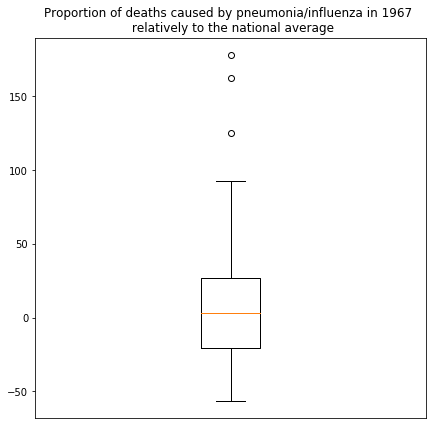

In [68]:
find_state_outliers(1967, boxplot=True)

In [69]:
for y in range(1962,2017):
    find_state_outliers(y)


High incidence outliers in 1962:
	Incidence in KS was 129.3% above the national average.
	Incidence in KY was 138.7% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1963:
	Incidence in KS was 107.2% above the national average.
	Incidence in KY was 148.0% above the national average.
	Incidence in NM was 107.0% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1964:
	Incidence in KS was 110.4% above the national average.
	Incidence in KY was 126.8% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1965:
	Incidence in KS was 125.7% above the national average.
	Incidence in KY was 131.7% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1966:
	Incidence in KS w

High incidence outliers in 2013:
	Incidence in HI was 71.8% above the national average.

--------------------------------------------------------------------------



Rough summary

* 1960s: KS, KY and NM bad
* 1970s: KS and NM, together with KY, OK, VA and RI, bad
* 1980s: HI bad at the end of the decade, otherwise no outliers.
* 1990s: DE good
* 2000s: DC good, DE flips from good to bad, IA, CT, CA bad
* 2010s: HI bad

In [70]:
def find_city_outliers(year, whiskers=1.5, boxplot=False, verbose=False):
    
    df_year = df_PI_incidence_by_city.loc[year]
    q1_US, q3_US = df_year['US_rel_diff'].quantile(0.25), df_year['US_rel_diff'].quantile(0.75)
    
    pos_outliers_US = df_year.loc[df_year['US_rel_diff'] < q1_US - whiskers*(q3_US-q1_US)]
    neg_outliers_US = df_year.loc[df_year['US_rel_diff'] > q3_US + whiskers*(q3_US-q1_US)]
        
    if pos_outliers_US.empty:
        if verbose == True:
            print('Low incidence outliers in {}:'.format(year))
            print('\t' + 'No state was far below the national average.')
        else:
            pass
    else:
        print('Low incidence outliers in {}:'.format(year))
        for i in range(pos_outliers_US.shape[0]):
            print('\t' + 'Incidence in {0[0]} ({0[1]}) was {1:.1f}% below the national average.'.format(pos_outliers_US.index[i], -100*pos_outliers_US.iloc[i,-2]))
        
    if neg_outliers_US.empty:
        if verbose == True:
            print('\n'+'High incidence outliers in {}:'.format(year))
            print('\t' + 'No state was far above the national average.')
        else:
            pass
    else:
        print('\n'+'High incidence outliers in {}:'.format(year))
        for i in range(neg_outliers_US.shape[0]):
            print('\t' + 'Incidence in {0[0]} ({0[1]}) was {1:.1f}% above the national average.'.format(neg_outliers_US.index[i], 100*neg_outliers_US.iloc[i,-2]))
    
    if (not pos_outliers_US.empty or not neg_outliers_US.empty):
        print('\n--------------------------------------------------------------------------\n')
        
    if boxplot == True:
        fig, ax = plt.subplots()
        fig.set_size_inches(7, 7)
        ax.boxplot(df_year['US_rel_diff']*100, whis=whiskers)
        ax.set(title='Proportion of deaths caused by pneumonia/influenza in {0} \n relatively to the national average'.format(year))
        plt.xticks([])
        plt.show()

Low incidence outliers in 2003:
	Incidence in Jersey City (NJ) was 100.0% below the national average.
	Incidence in New Orleans (LA) was 100.0% below the national average.

High incidence outliers in 2003:
	Incidence in Fall River (MA) was 98.5% above the national average.
	Incidence in Pasadena (CA) was 94.2% above the national average.
	Incidence in San Francisco (CA) was 89.6% above the national average.
	Incidence in Worcester (MA) was 94.1% above the national average.

--------------------------------------------------------------------------



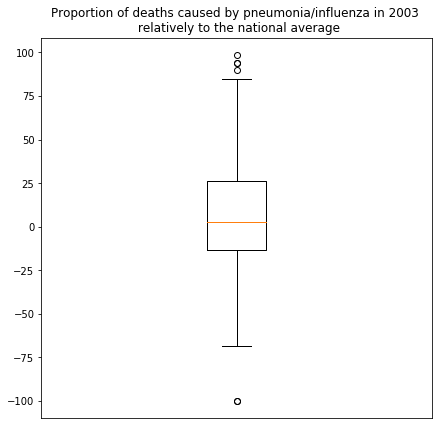

In [71]:
find_city_outliers(2003, boxplot=True)

In [72]:
for y in range(1962,2017):
    find_city_outliers(y)


High incidence outliers in 1962:
	Incidence in Austin (TX) was 216.7% above the national average.
	Incidence in Ogden (UT) was 212.3% above the national average.
	Incidence in San Jose (CA) was 205.6% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1963:
	Incidence in Austin (TX) was 230.7% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1965:
	Incidence in Utica (NY) was 312.8% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1966:
	Incidence in Utica (NY) was 259.2% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1969:
	Incidence in Cambridge (MA) was 407.1% above the national average.

----------------------------------------------------------------

Rough summary

* 1960s: Austin and Utica were bad for two-three years.
* 1970s: Cambridge was very bad for six years and Pueblo rather bad for two.
* 1980s: Cambridge occasionally bad
* 1990s: Reading and Long beach bad for a few years
* 2000s: Jersey City, Elizabeth, Wilimington, New Orleans, Baton Rouge particularly good; Glendale, Long Beach and others bad.
* 2010s: Somerville, Springfield and a few others particularly good; Glendale, Worcester bad.

**Note for improvement**: We could figure out a prettier way to display the results of the analysis of outliers. Moreover, it could be interesting to enable the *city_outliers* function to spot outliers wrt the state average (when meaningful), independently of them being outliers wrt the national average. Maybe we'd need to redesign it to take a city as an argument, rather than a year.